# <h1> Import dataset

In [55]:
# link dataset: https://data.cityofnewyork.us/Transportation/2020-Green-Taxi-Trip-Data/pkmi-4kfn
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
# path="/content/drive/MyDrive/DS105/Do_An/"

In [1]:
import os

os.chdir(r"f:\Nam 3\hoc_ky_5\DS105_pt&tqdl\Do_an")
os.getcwd()

'f:\\Nam 3\\hoc_ky_5\\DS105_pt&tqdl\\Do_an'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utility import path, picture_path



In [3]:
#loading dataset
df_step4=pd.read_csv(path+r"/finall_data.csv",index_col=False)

# <h1> 4. Trực quan bộ dữ liệu

## <h2> 4.2 Trực quan dữ liệu đa biến

In [4]:
cat_col=list(df_step4.select_dtypes(["int64"]).columns)
cat_col

['VendorID',
 'store_and_fwd_flag',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'passenger_count',
 'improvement_surcharge',
 'payment_type',
 'trip_type',
 'pickup_month',
 'pickup_weekday',
 'pickup_hour',
 'dropoff_month',
 'dropoff_weekday',
 'dropoff_hour']

In [5]:
con_col=list(df_step4.select_dtypes(["float64"]).columns)
con_col

['trip_distance',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'congestion_surcharge',
 'trip_duration']

### <h3> 4.2.1 Trực quan các đơn biến liên tục với thuộc tính tip_amount 


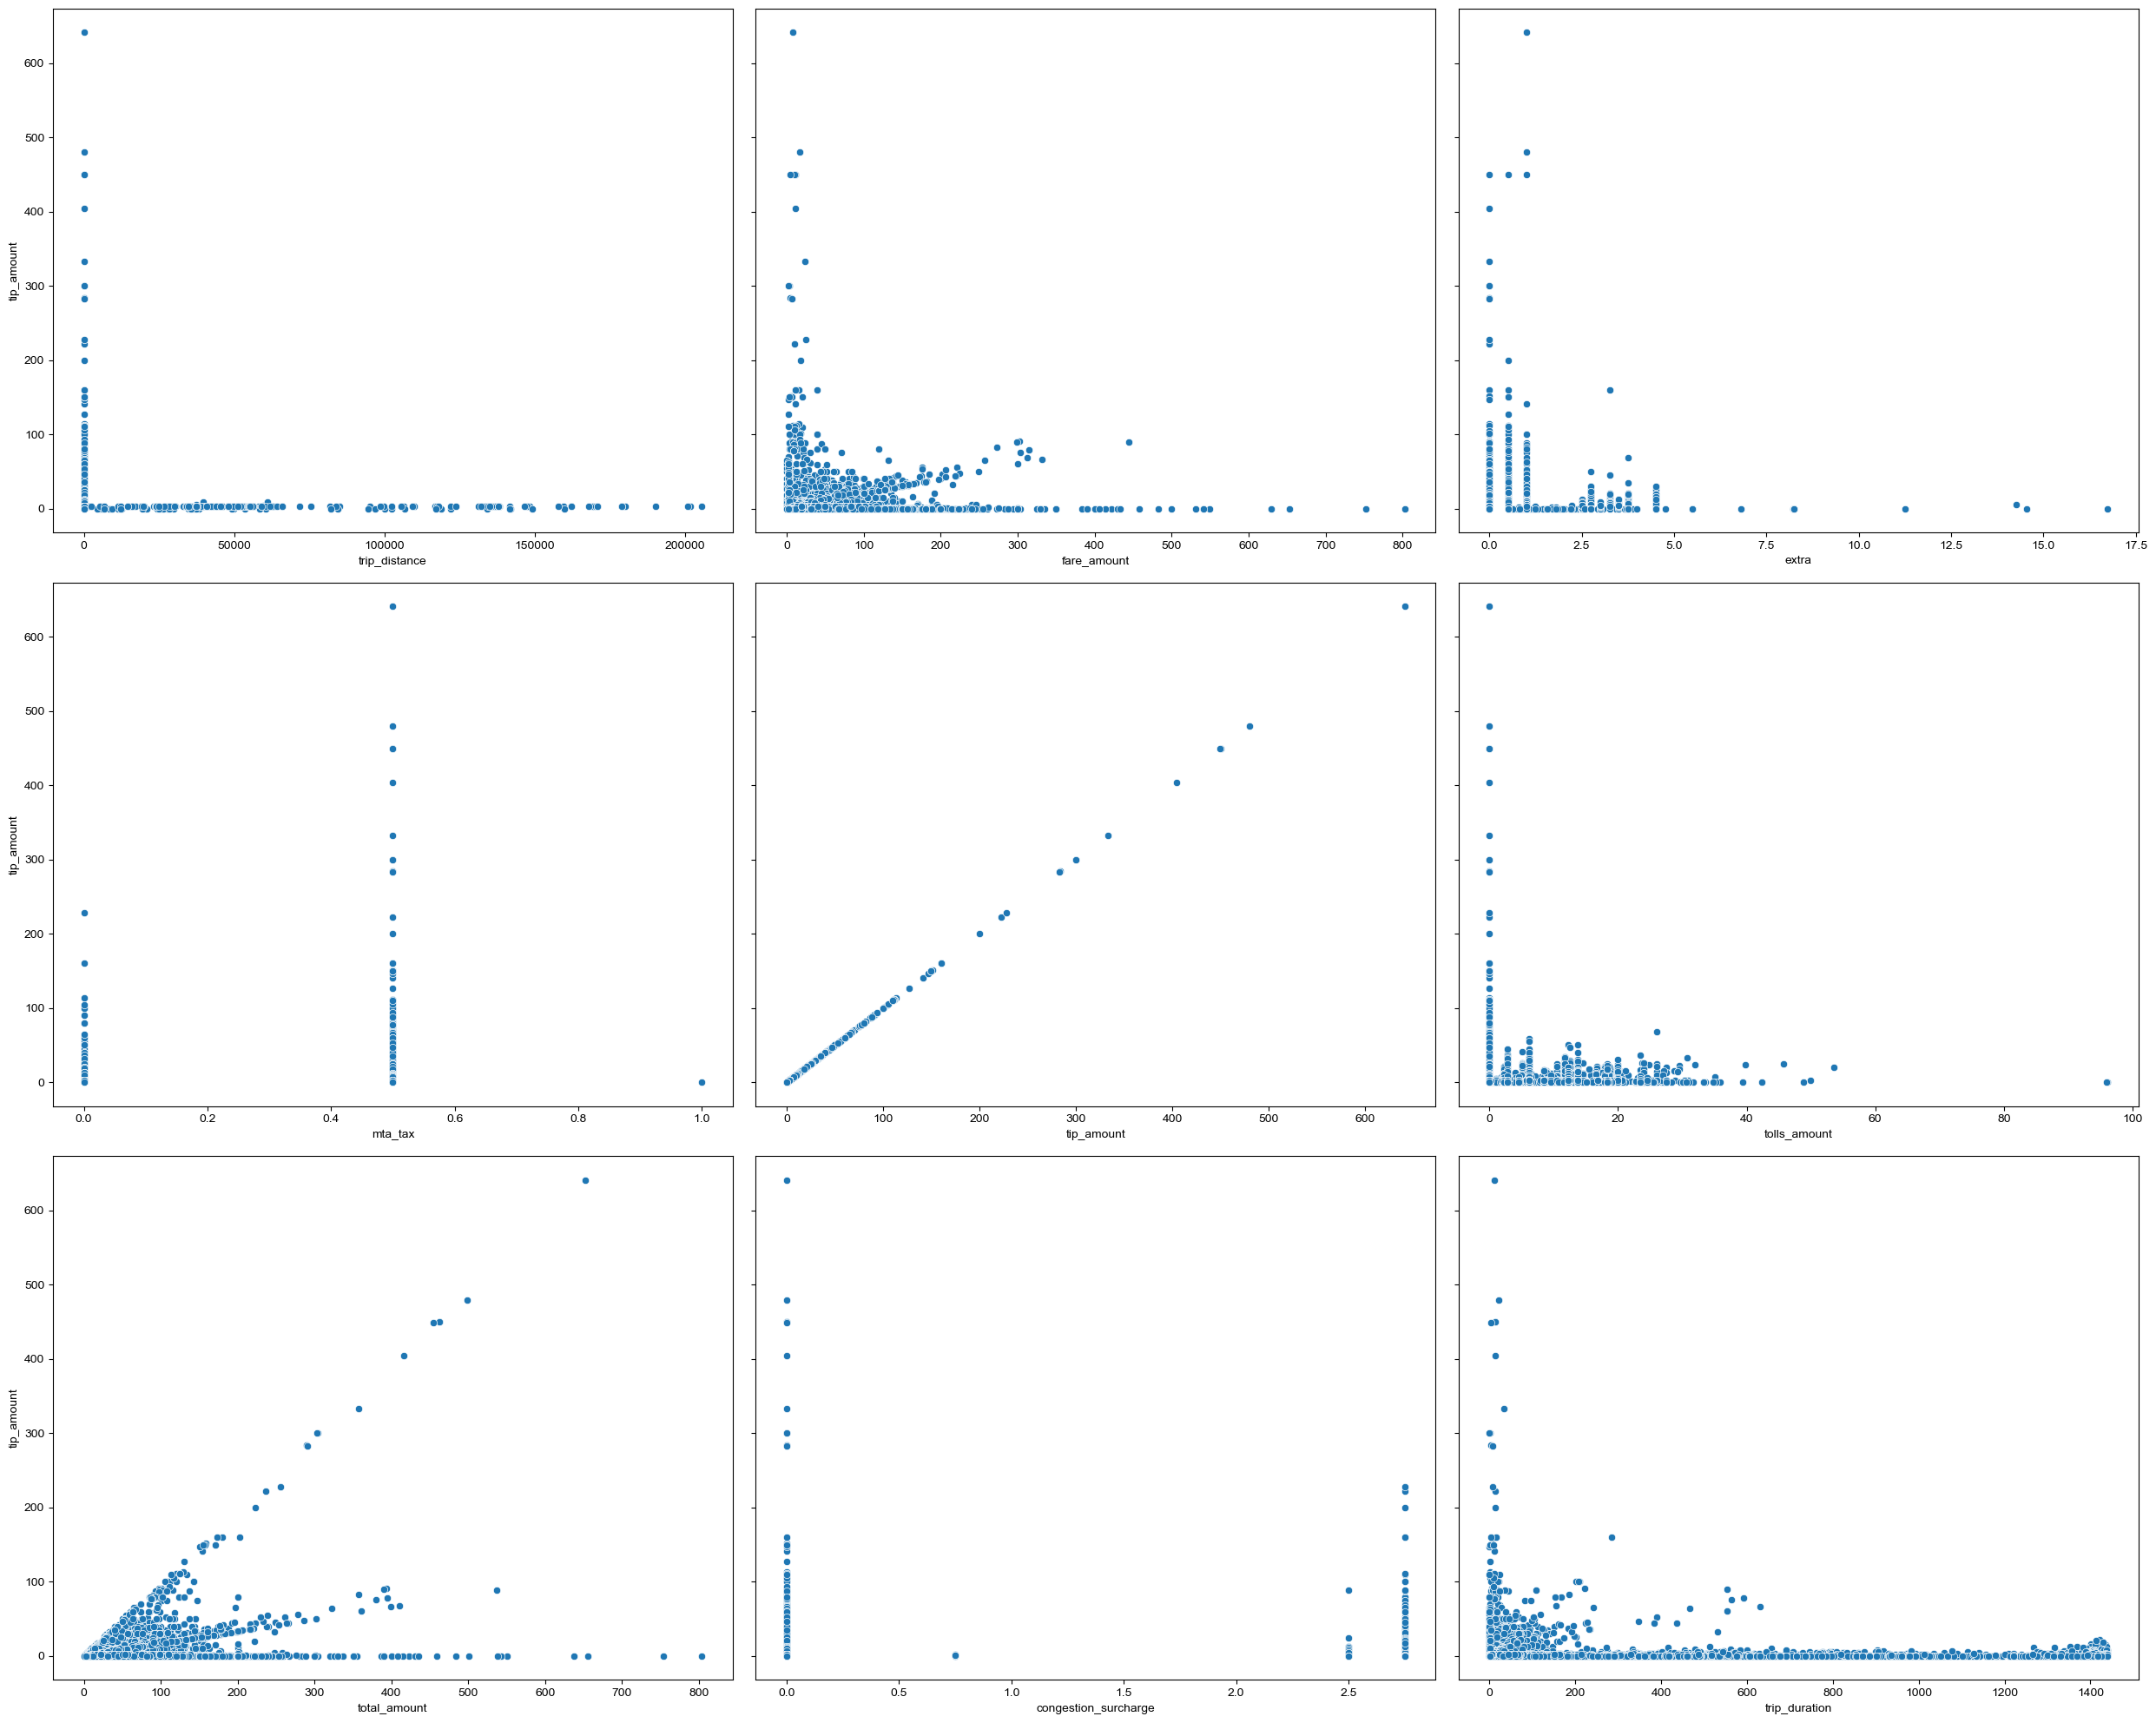

In [6]:
x=con_col
data=df_step4
y="tip_amount"
f,ax=plt.subplots(round(len(x)/3),3,figsize=(25,20),sharey=True)
for i,a in zip(x,ax.flat):
  sns.set(rc = {'figure.figsize':(20,10)})
  p=sns.scatterplot(x=i,data=data,y=y,ax=a)
  # p.set_ylim(0,64.12)

  p.ticklabel_format(style='plain')
plt.tight_layout()
plt.show()
f.savefig(picture_path+r'/eda_continuous_variable_with '+y+ ' .png')


### 4.2.2 Visualize continuous variables with total amount

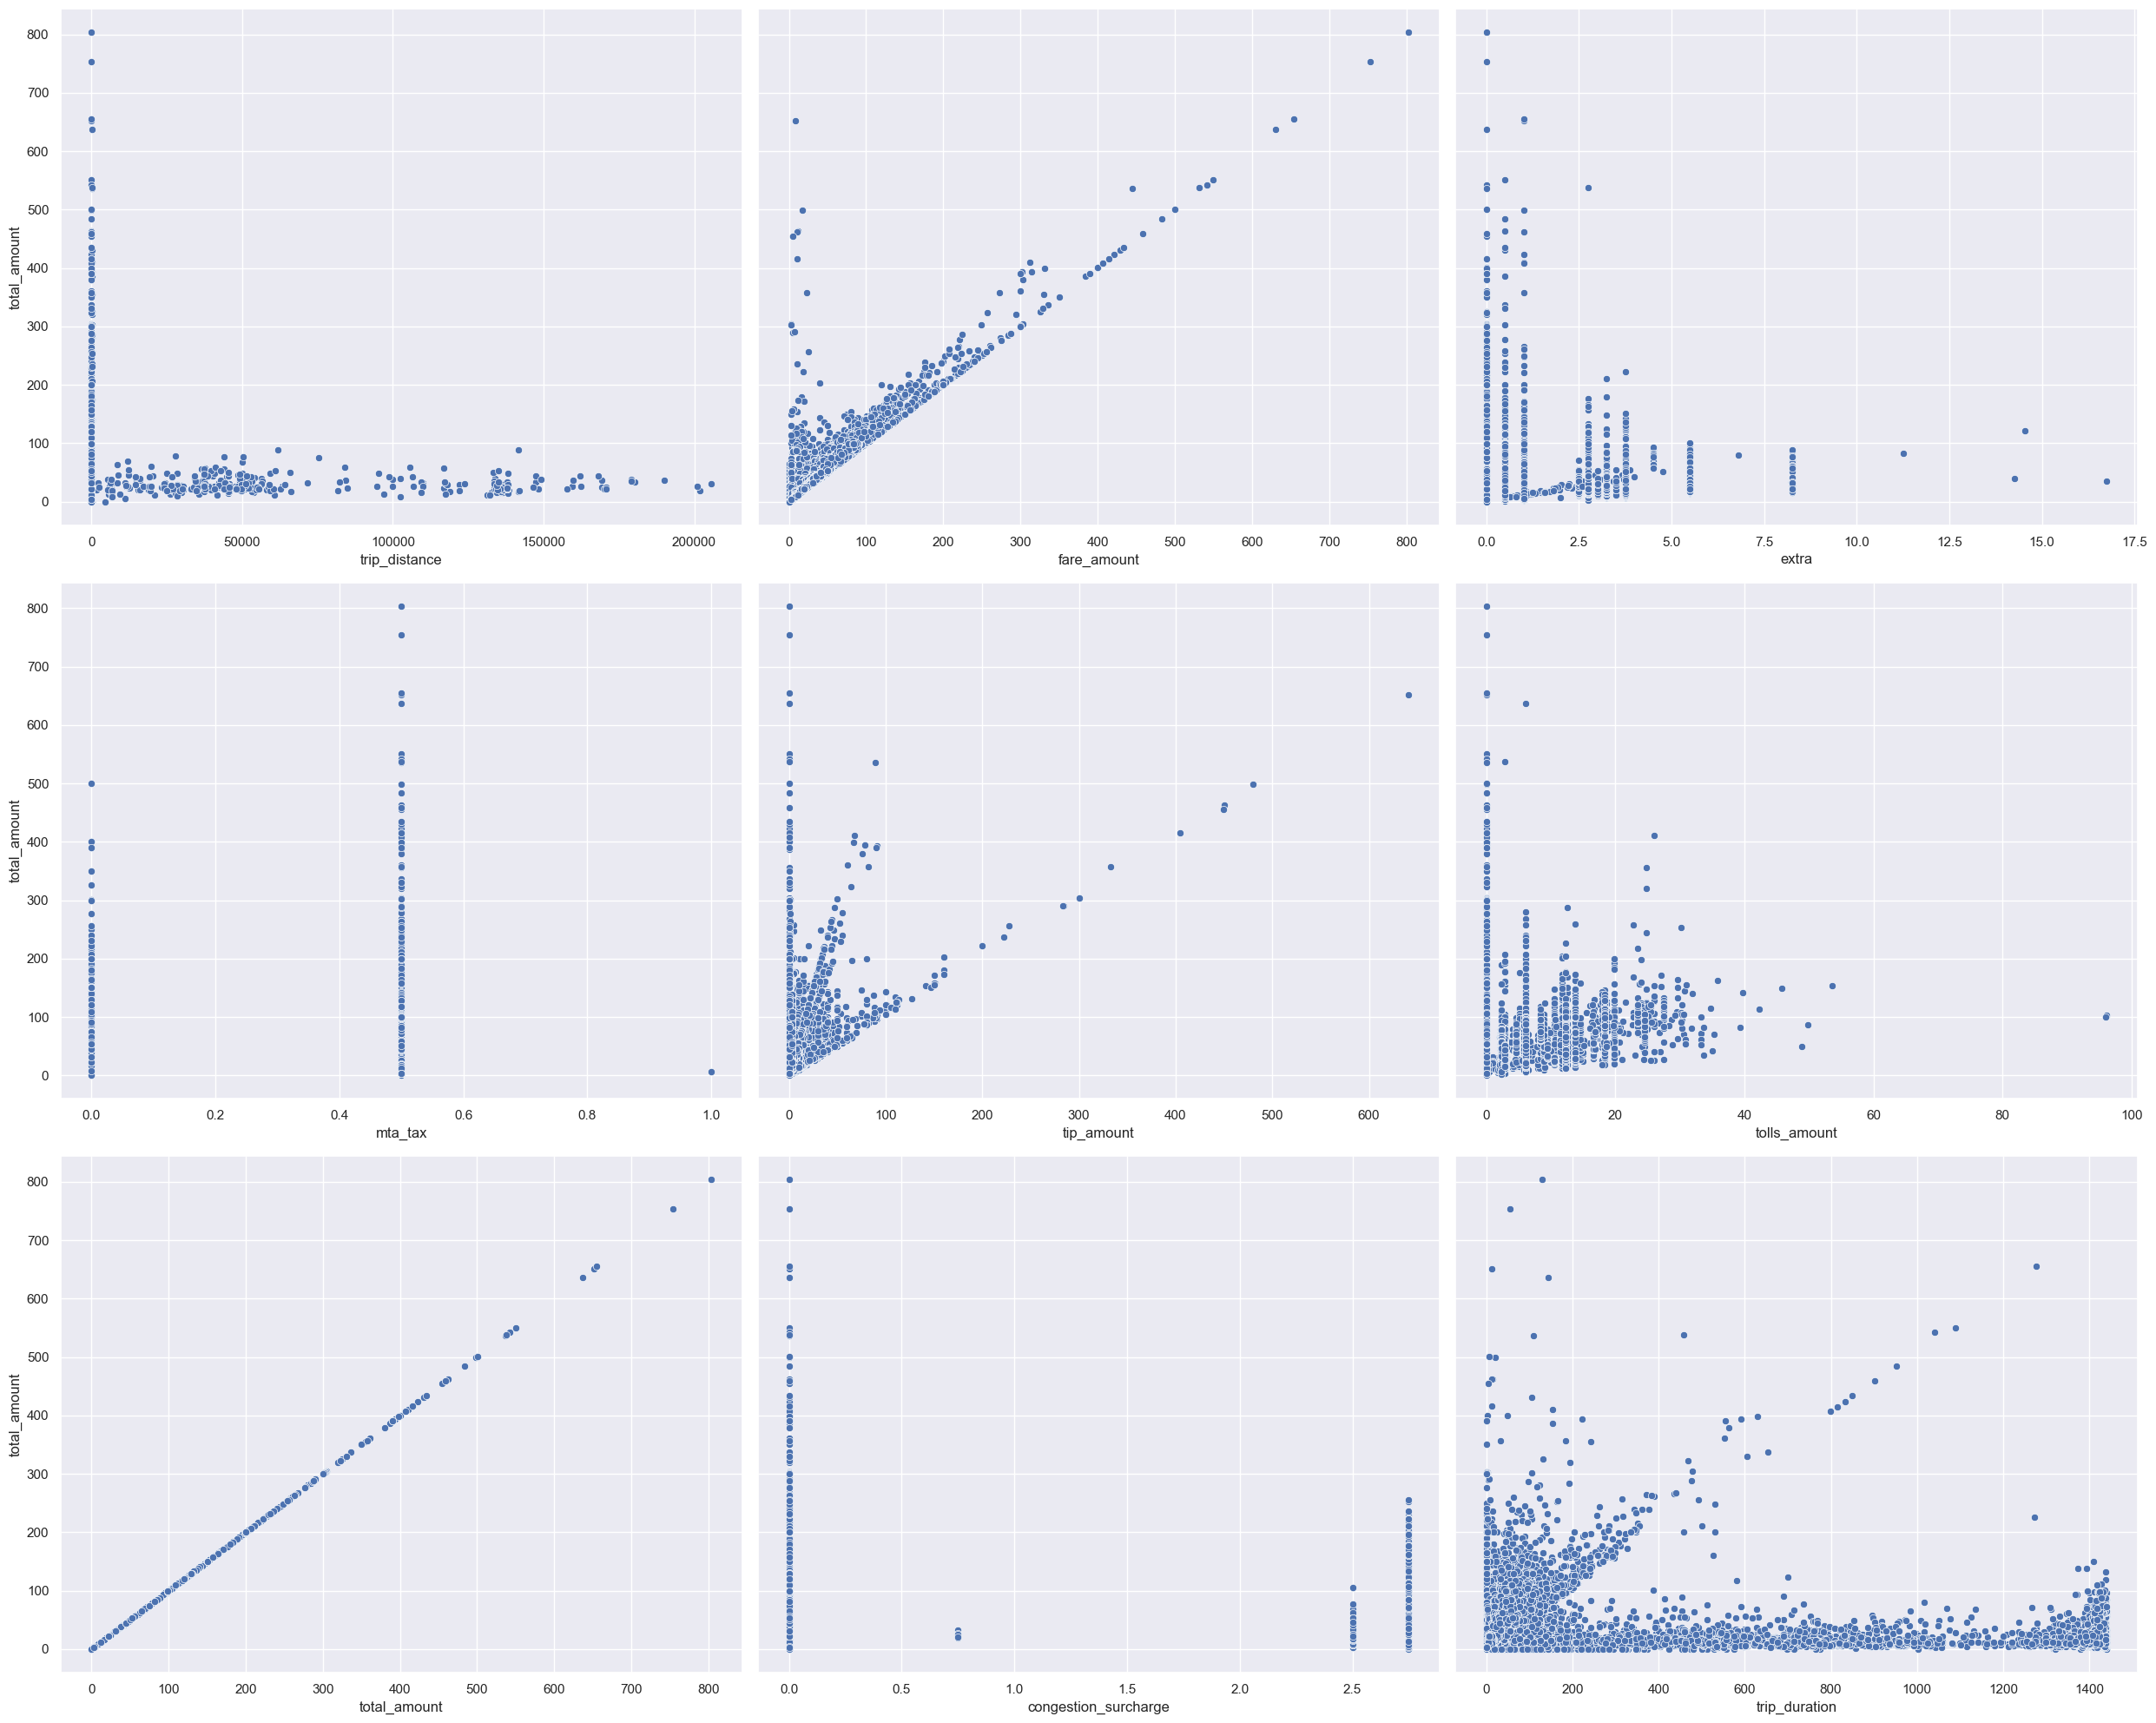

In [7]:
x=con_col
data=df_step4
y="total_amount"
f,ax=plt.subplots(round(len(x)/3),3,figsize=(25,20),sharey=True)
for i,a in zip(x,ax.flat):
  sns.set(rc = {'figure.figsize':(20,10)})
  p=sns.scatterplot(x=i,data=data,y=y,ax=a)
  # p.set_ylim(0,64.12)

  p.ticklabel_format(style='plain')
plt.tight_layout()
plt.show()
f.savefig(picture_path+r'/eda_continuous_variable_with '+y+ ' .png')

In [8]:
#save each pic
def save_scatter(x,y,data):
  for i in x:
    sns.set(rc = {'figure.figsize':(15,10)})
    p=sns.scatterplot(x=i,data=data,y=y)

    # p.set_ylim(0,64.12)
    p.ticklabel_format(style='plain')
    plt.title("scatterplot between "+i+" vs "+y)
    fig=p.get_figure()
    plt.savefig(picture_path+r"/scatterplot between "+i+" vs "+y +" .png")
    plt.close()

In [9]:
save_scatter(x=con_col,y='total_amount',data=data)

###  4.2.3 Trực quan đa biến phân loại với tip_amount 

In [10]:
np.histogram(df_step4.tip_amount)

(array([1728680,      70,       9,       3,       4,       1,       1,
              4,       0,       1], dtype=int64),
 array([  0.  ,  64.12, 128.24, 192.36, 256.48, 320.6 , 384.72, 448.84,
        512.96, 577.08, 641.2 ]))

Vùng giá trị của tip_amount chỉ tập trung chủ yếu tại  0 - 64.12 nên sẽ lấy khoảng này để trực quan

In [11]:
cat_col_b=['PU_Borough','DO_Borough','PU_service_zone','DO_service_zone','pickup_month','dropoff_month','pickup_weekday','dropoff_weekday',
       'pickup_hour','dropoff_hour','pickup_bin_hours', 'dropoff_bin_hours']

In [12]:
cat_col_a = [col for col in cat_col if col not in ('DOLocationID','PULocationID','pickup_month',
 'pickup_weekday',
 'pickup_hour',
 'dropoff_month',
 'dropoff_weekday',
 'dropoff_hour')]

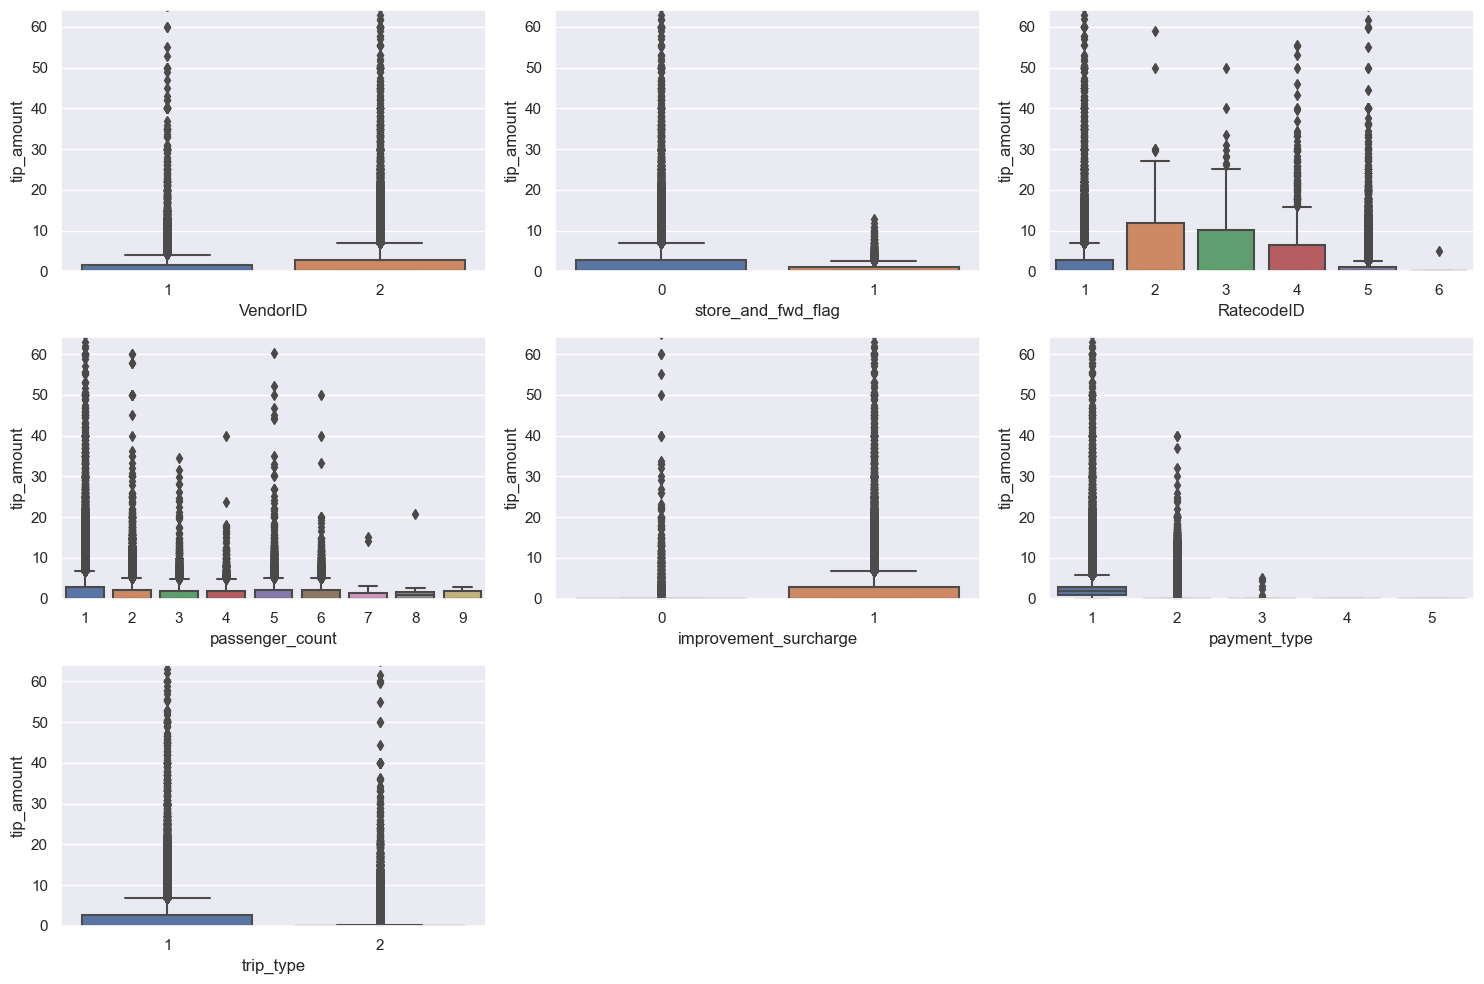

In [13]:
x=cat_col_a
data=df_step4
y="tip_amount"
f=plt.figure(figsize=(15,10))
for i,col in enumerate(x):
  ax=f.add_subplot(331+i)
  sns.set(rc = {'figure.figsize':(8,8)})
  sns.boxplot(x=col,data=data,y=y)
  ax.set_ylim(0,64.12)

plt.tight_layout()
plt.show()
f.savefig(picture_path+r'/eda_categorical_variable_with_'+y+' .png')

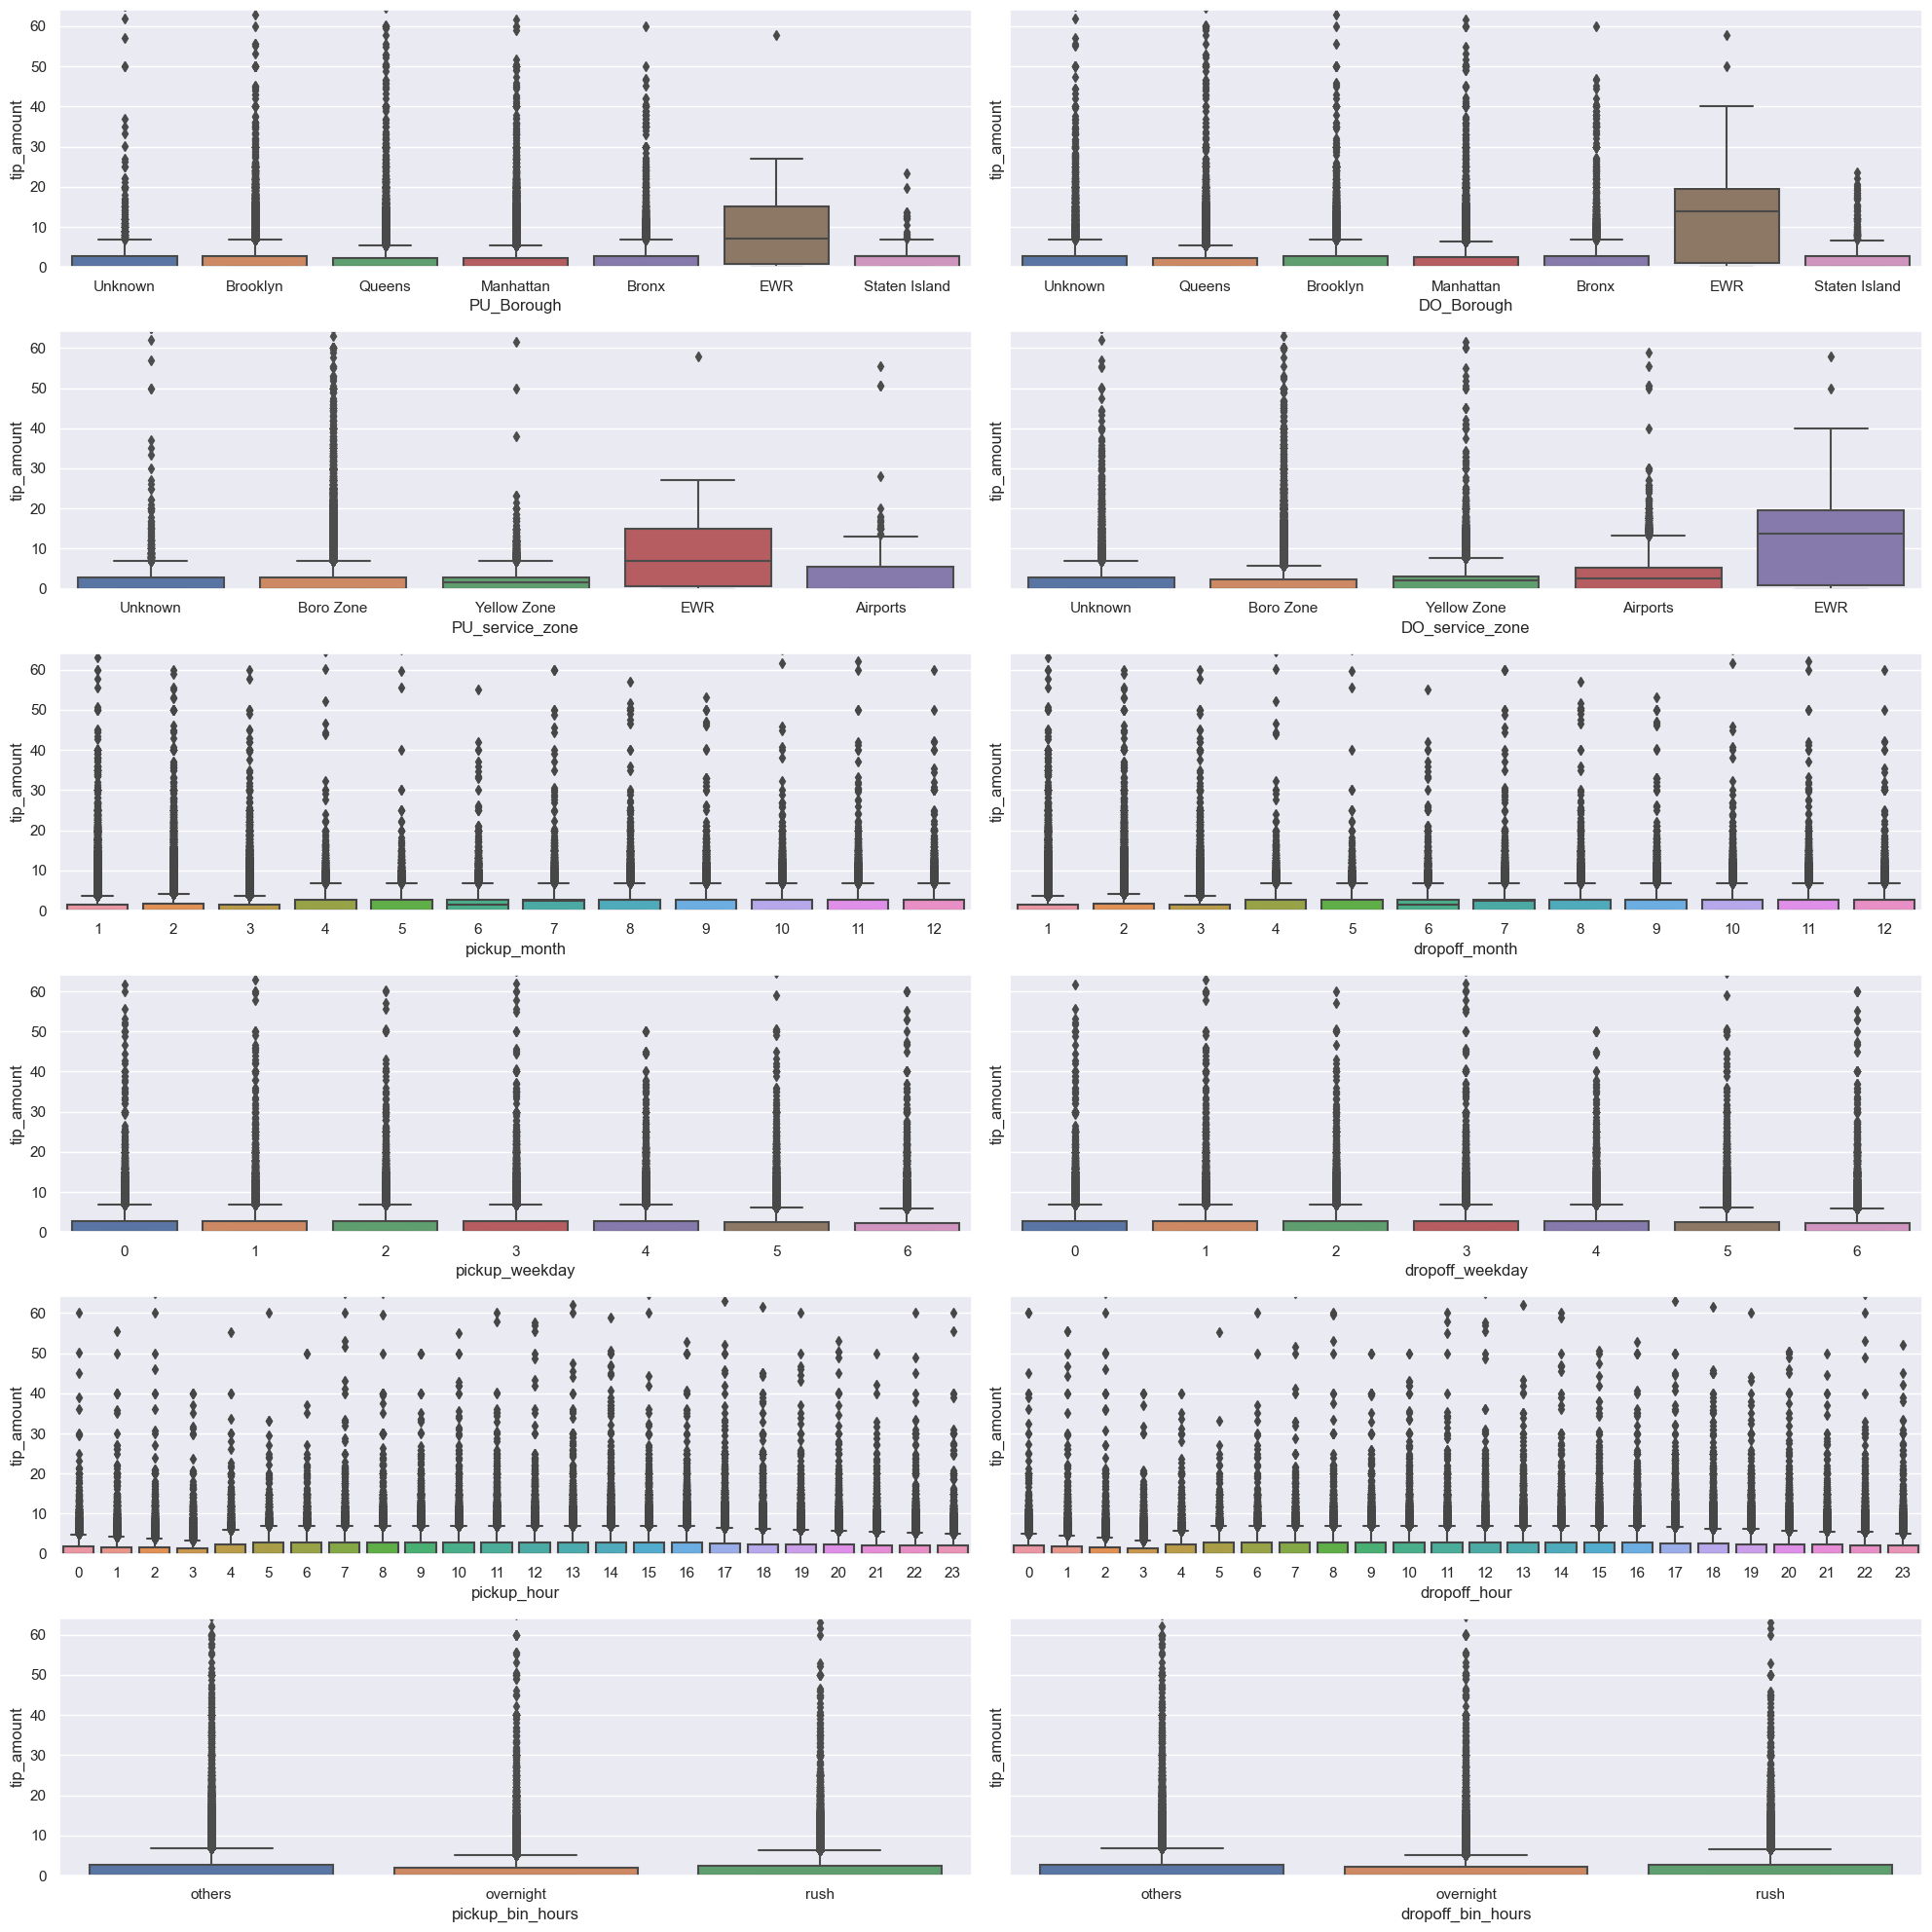

In [14]:
x=cat_col_b
data=df_step4
y="tip_amount"
f,ax=plt.subplots(round(len(x)/2),2,figsize=(20,20),sharey=True)
for i,a in zip(x,ax.flat):
  sns.set(rc = {'figure.figsize':(10,10)})
  p=sns.boxplot(x=i,data=data,y=y,ax=a)
  p.set_ylim(0,64.12)

plt.tight_layout()
plt.show()
f.savefig(picture_path+r'/eda_dual_categorical_variable_with_'+y+' .png')

### 4.2.4. Visualize categorical variables with total_amount

In [15]:
np.histogram(df_step4.total_amount)


(array([1719686,    8809,     198,      36,      21,      11,       7,
              1,       2,       2], dtype=int64),
 array([  0.  ,  80.38, 160.76, 241.14, 321.52, 401.9 , 482.28, 562.66,
        643.04, 723.42, 803.8 ]))

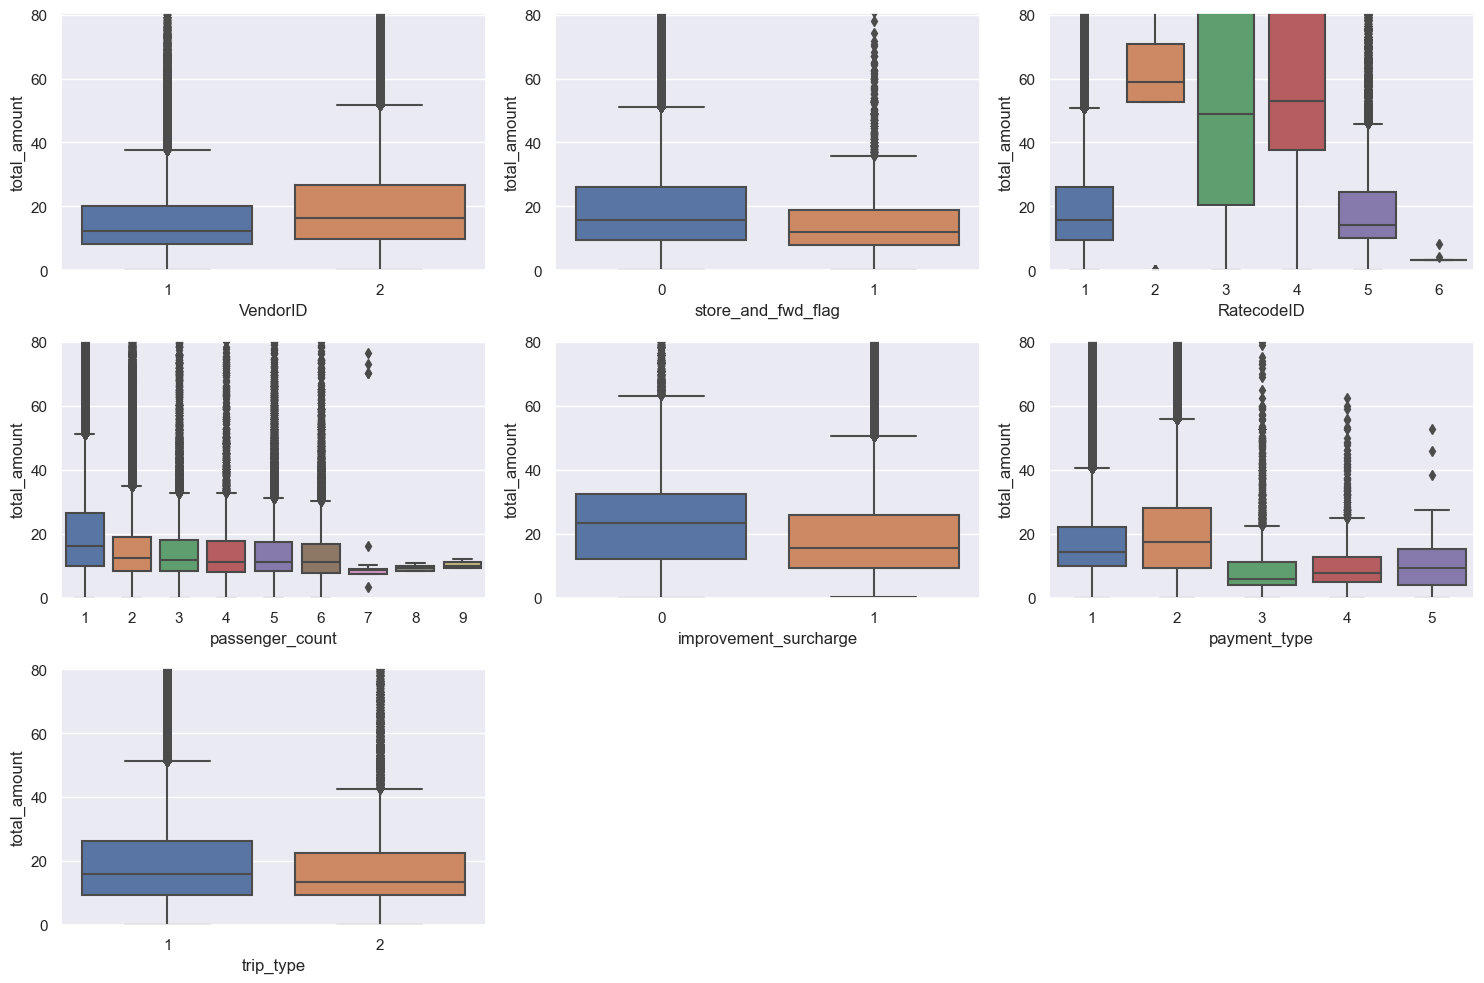

In [16]:
x=cat_col_a
data=df_step4
y="total_amount"
f=plt.figure(figsize=(15,10))
for i,col in enumerate(x):
  ax=f.add_subplot(331+i)
  sns.set(rc = {'figure.figsize':(8,8)})
  sns.boxplot(x=col,data=data,y=y)
  ax.set_ylim(0,80.38)

plt.tight_layout()
plt.show()
f.savefig(picture_path+r'/eda_categorical_variable_with_'+y+' .png')

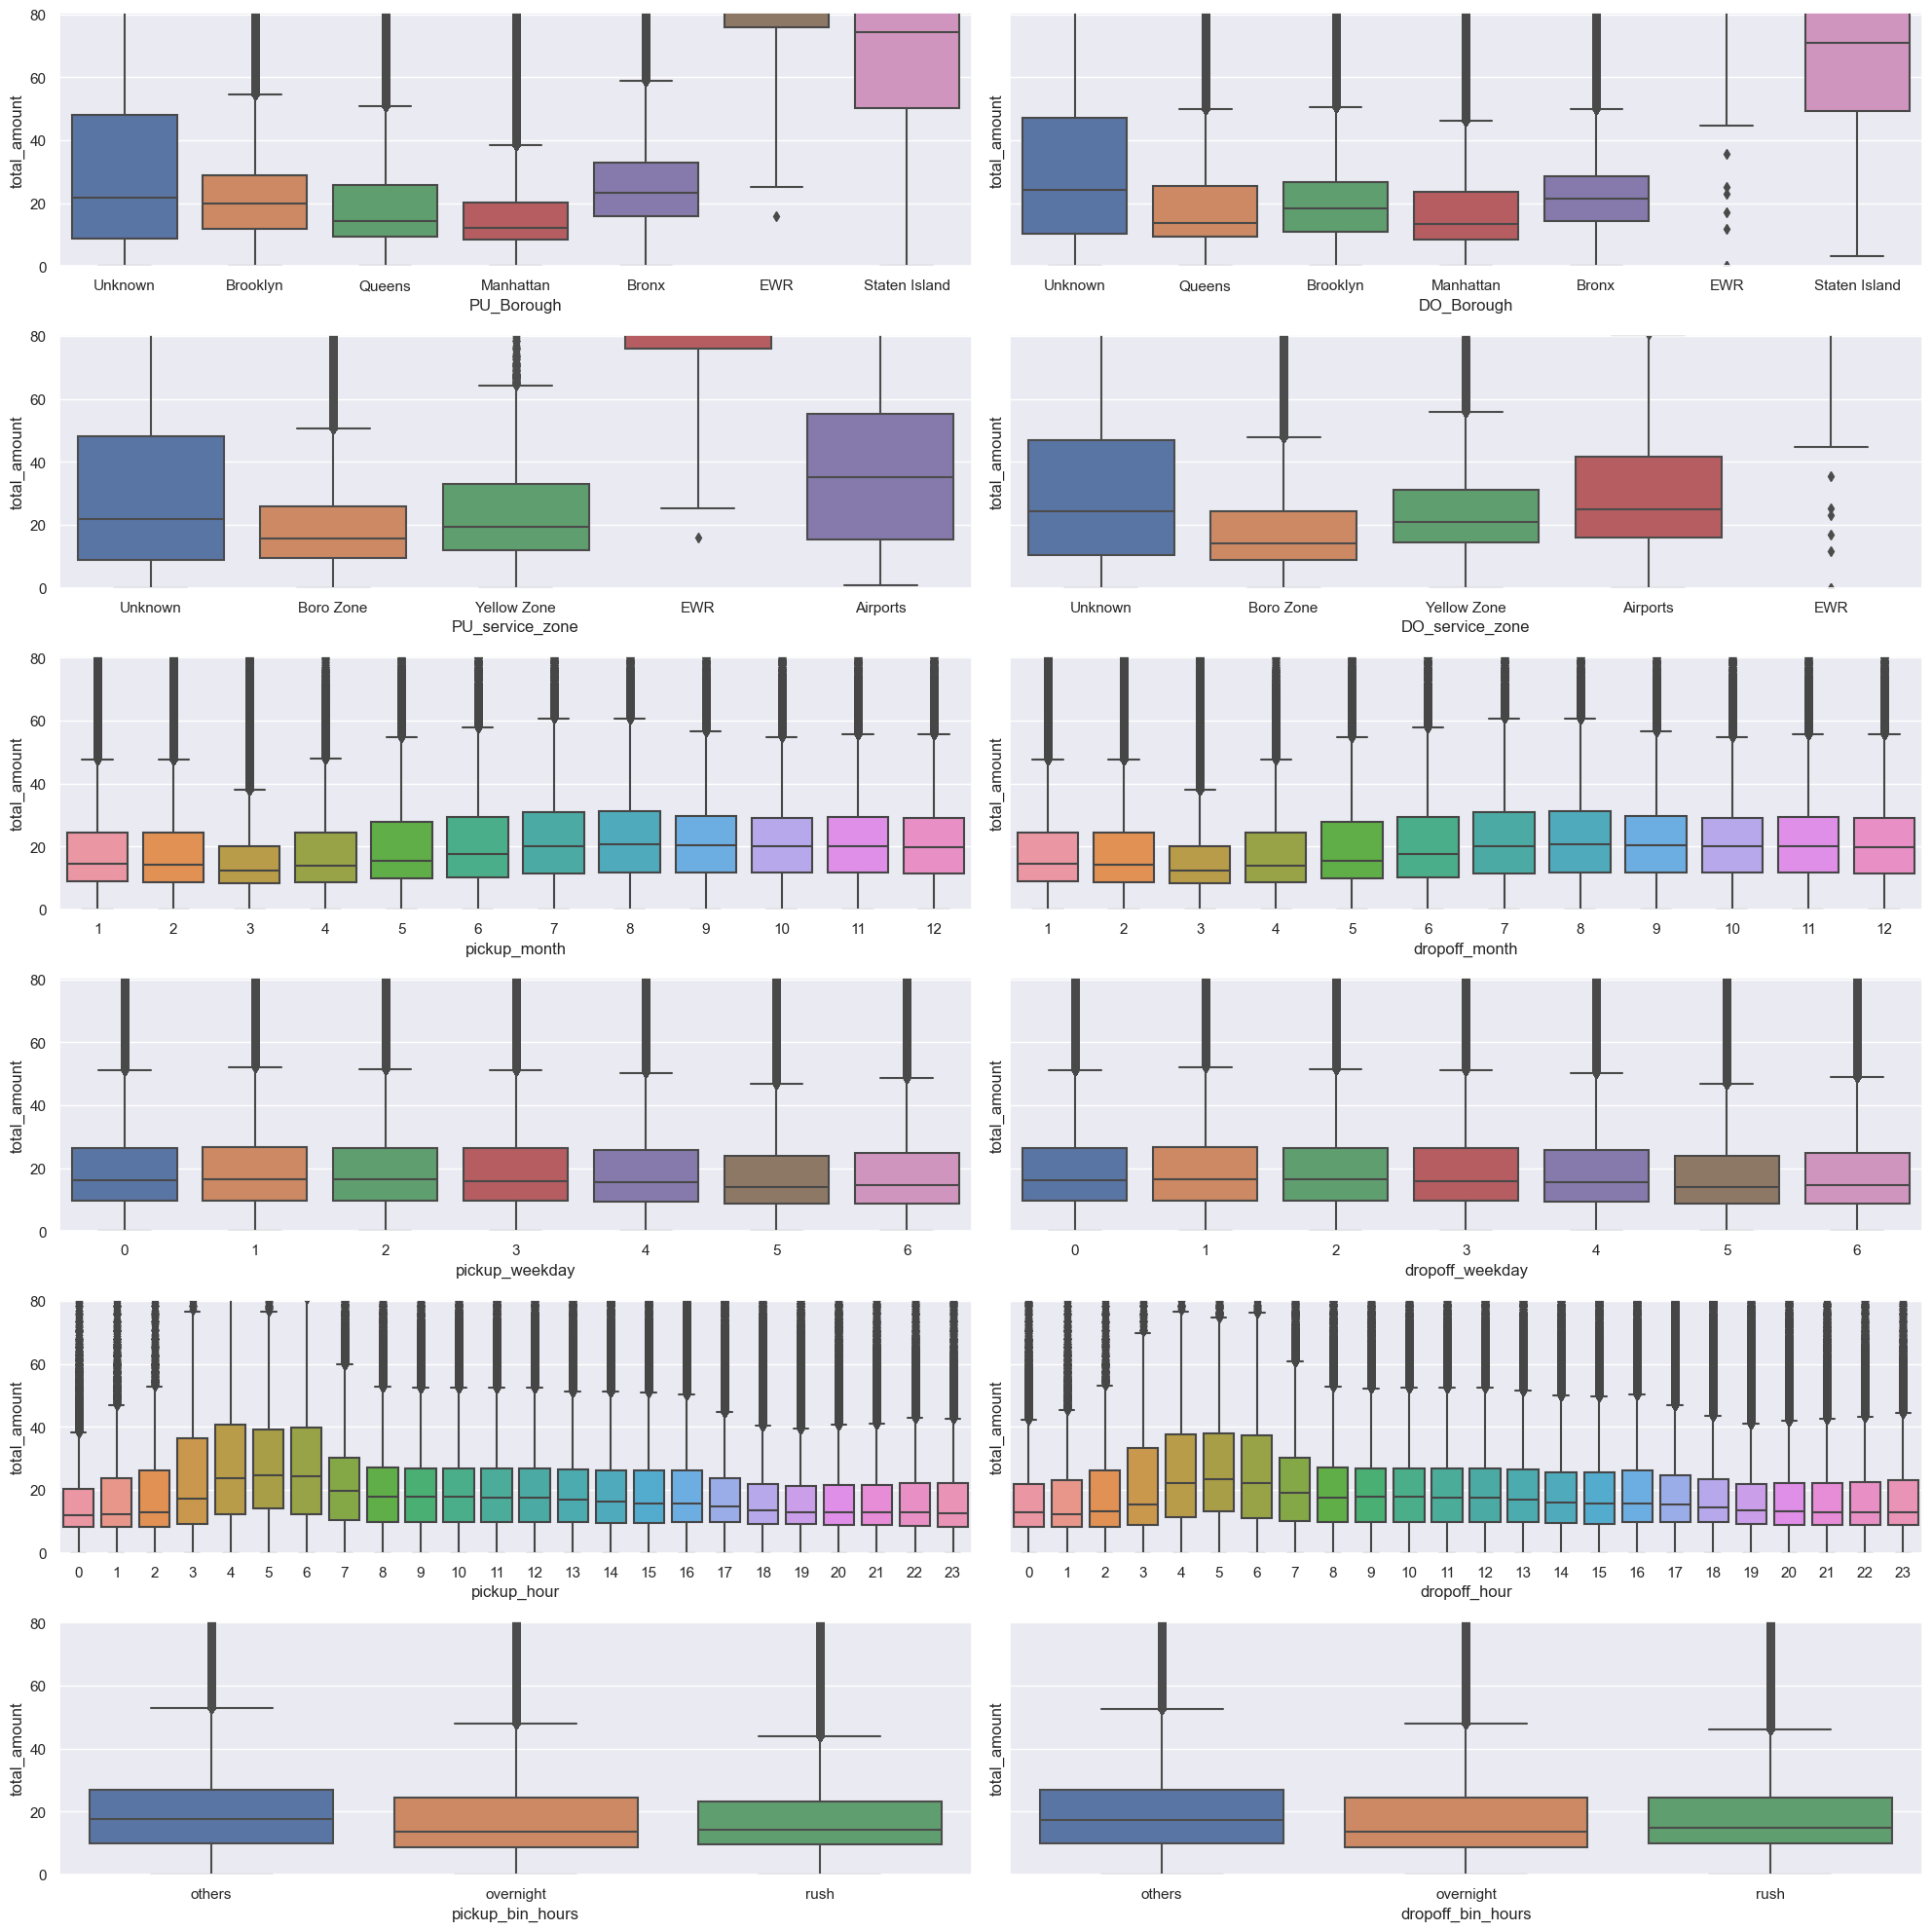

In [17]:
x=cat_col_b
data=df_step4
y="total_amount"
f,ax=plt.subplots(round(len(x)/2),2,figsize=(20,20),sharey=True)
for i,a in zip(x,ax.flat):
  sns.set(rc = {'figure.figsize':(10,10)})
  p=sns.boxplot(x=i,data=data,y=y,ax=a)
  p.set_ylim(0,80.38)

plt.tight_layout()
plt.show()
f.savefig(picture_path+r'/eda_dual_categorical_variable_with_'+y+' .png')

In [18]:
#save each boxplot
def save_boxplot(x,y,data,y_lim):
  for i in x:
    sns.set(rc = {'figure.figsize':(10,10)})
    p=sns.boxplot(x=i,data=data,y=y)
    p.set_ylim(y_lim)
    fig=p.get_figure()
    plt.savefig(picture_path+r"/boxplot between "+i+" vs "+y +" .png")
    plt.close()

In [74]:
# for i in cat_col_b:
#   sns.set(rc = {'figure.figsize':(10,10)})
#   p=sns.boxplot(x=i,data=data,y=y)
#   p.set_ylim(0,64.12)
#   fig=p.get_figure()
#   plt.savefig(path+"picture/boxplot between "+i+" vs "+y +" .png")
#   plt.close()

In [19]:
save_boxplot(x=cat_col_a,y="total_amount",data=df_step4,y_lim=(0,80.38))

In [20]:
save_boxplot(x=cat_col_b,y="total_amount",data=df_step4,y_lim=(0,80.38))

### 4.2.5 Ảnh hưởng của các biến thời gian tới tip_amount

In [21]:
def lineplot(x1,x2,y,data):
  ax=sns.lineplot(x=x1,y=y,data=data,errorbar=None,marker="o",label=x1,dashes=False,color="red")
  ax1=sns.lineplot(x=x2,y=y,data=data,errorbar=None,label=x2,ax=ax,marker="o",dashes=False,color="green")
  plt.xlabel(x1.split("_")[1])
  plt.title("Lineplot of "+x1+", "+x2+" and "+y)
  plt.legend()
  plt.show()
  f=ax.get_figure()
  f.savefig(picture_path+r"/Lineplot of "+x1+", "+x2+" and "+y+" .png")


c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

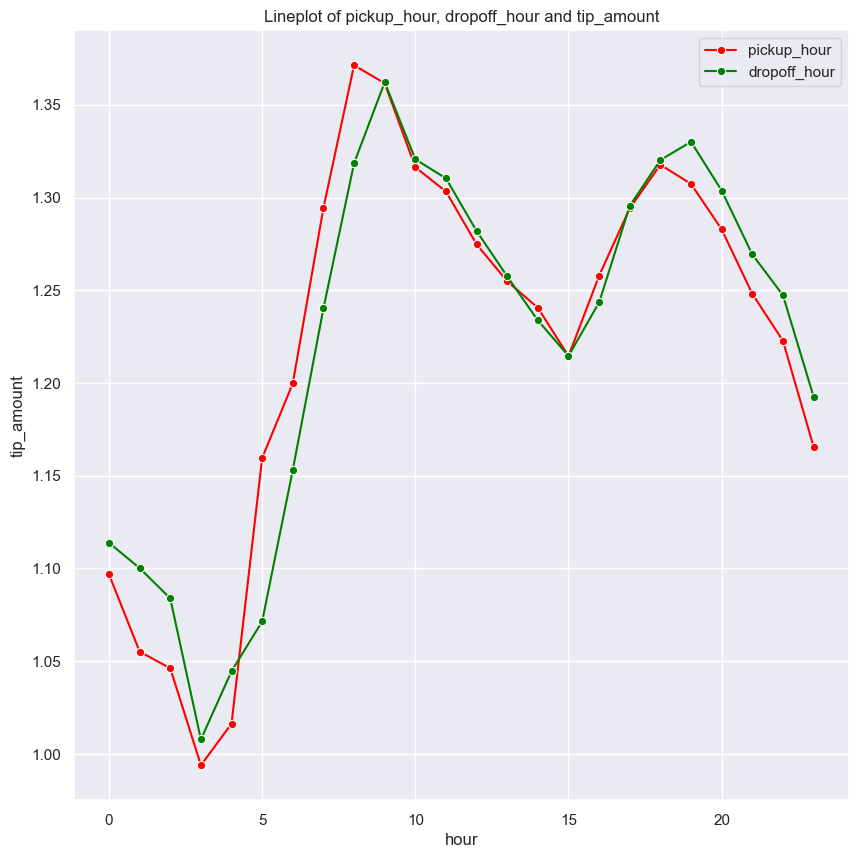

In [22]:
lineplot(x1="pickup_hour",x2="dropoff_hour",y="tip_amount",data=df_step4)

c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

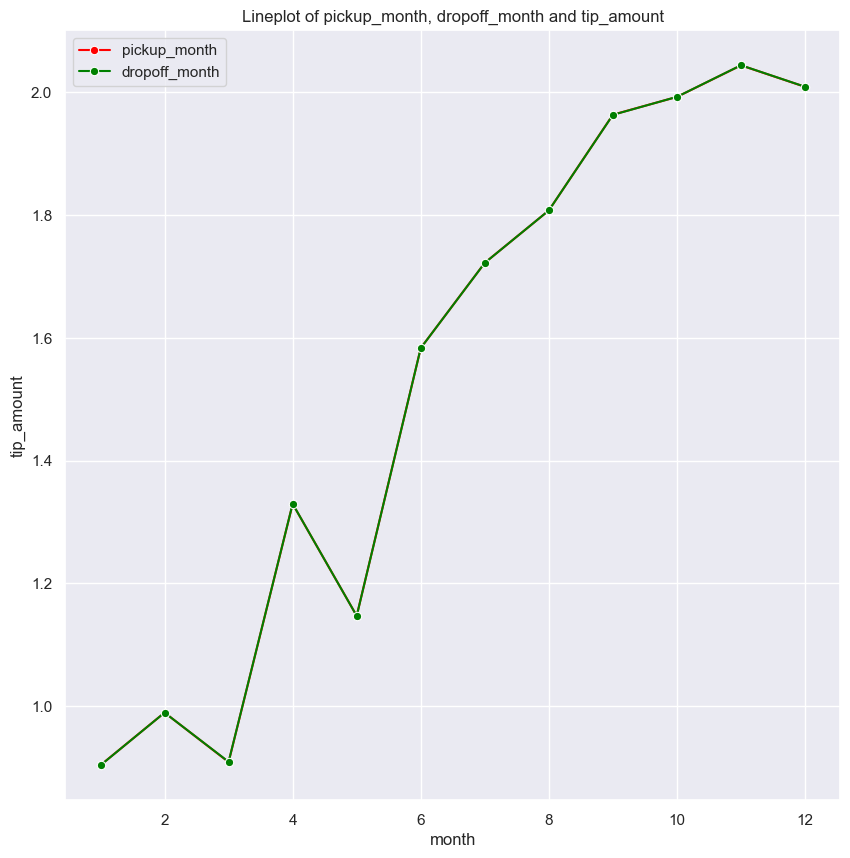

In [23]:
lineplot(x1="pickup_month",x2="dropoff_month",y="tip_amount",data=df_step4)

c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

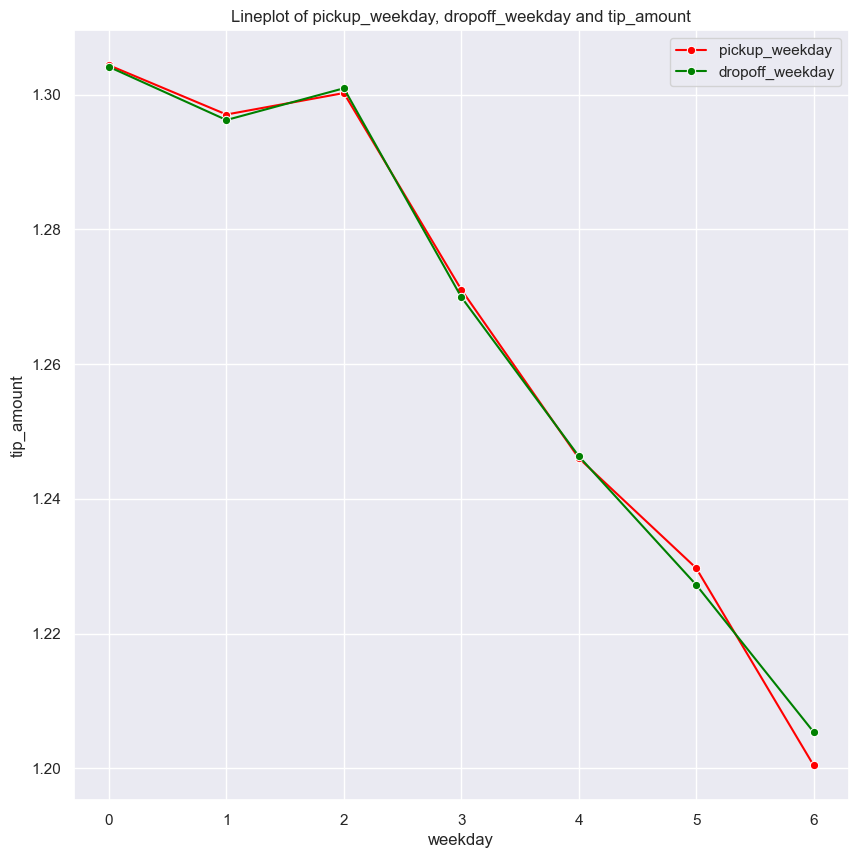

In [24]:
lineplot(x1="pickup_weekday",x2="dropoff_weekday",y="tip_amount",data=df_step4)

### 4.2.6 Visualize time variables with total_amount

c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

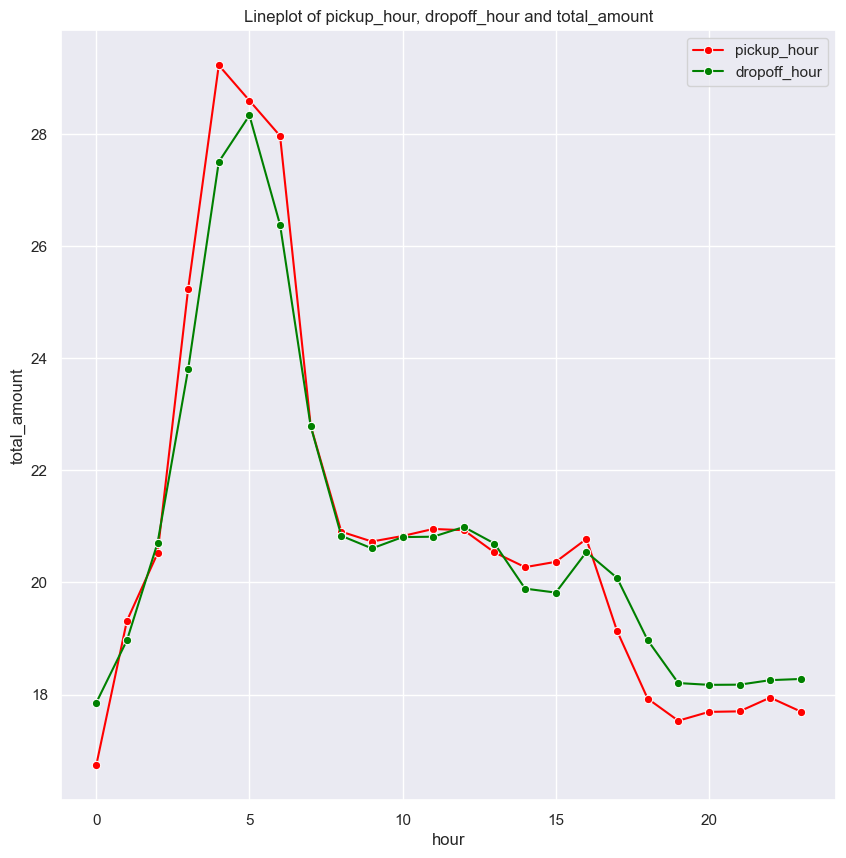

In [25]:
lineplot(x1="pickup_hour",x2="dropoff_hour",y="total_amount",data=df_step4)

c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

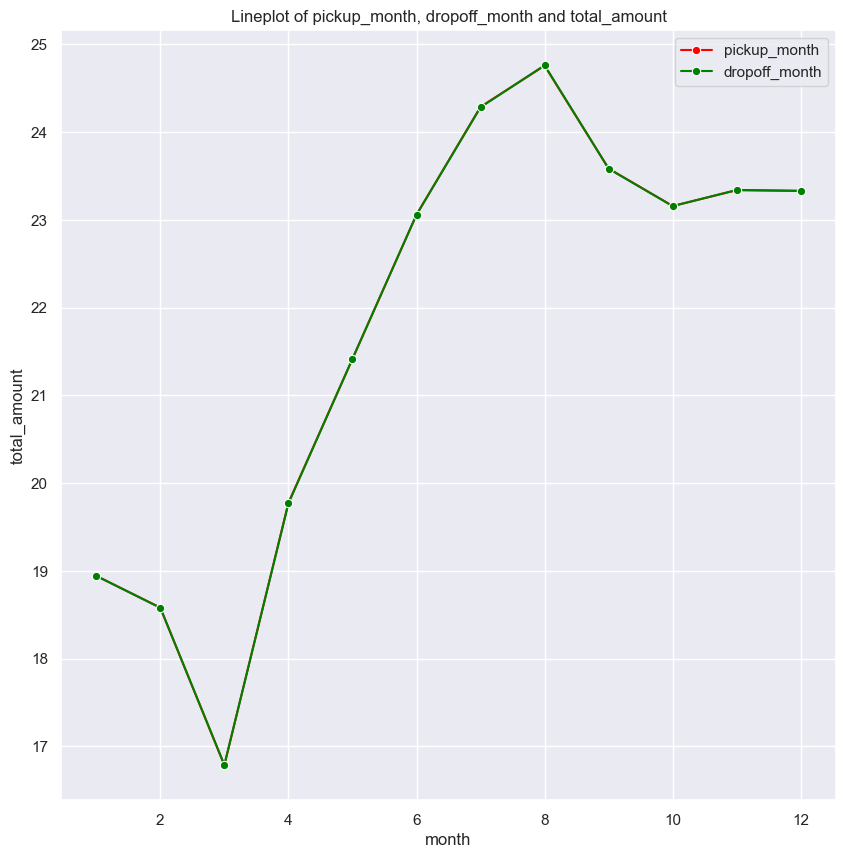

In [26]:
lineplot(x1="pickup_month",x2="dropoff_month",y="total_amount",data=df_step4)

c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

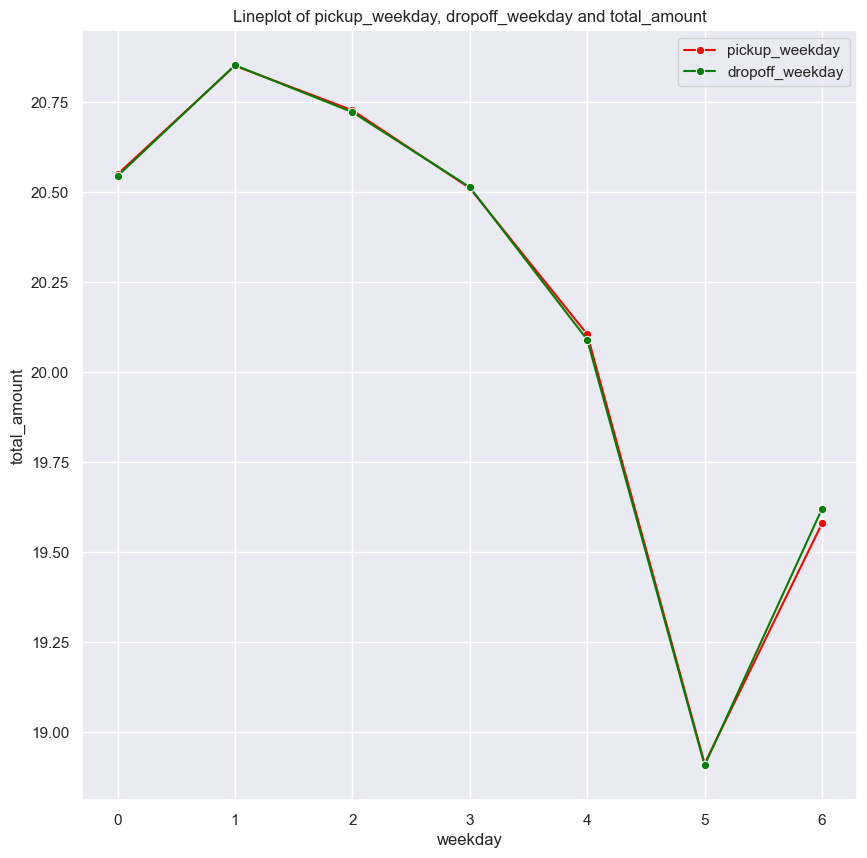

In [27]:
lineplot(x1="pickup_weekday",x2="dropoff_weekday",y="total_amount",data=df_step4)

### 4.2.7 Comparison between tip_amount and total_amount with time variables

c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

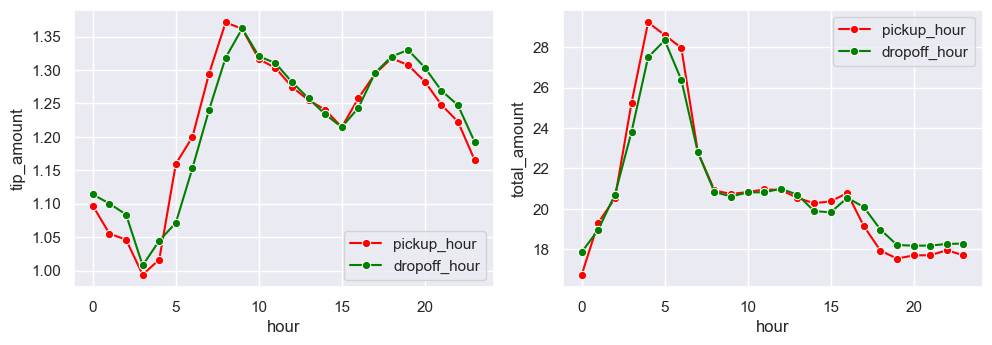

c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

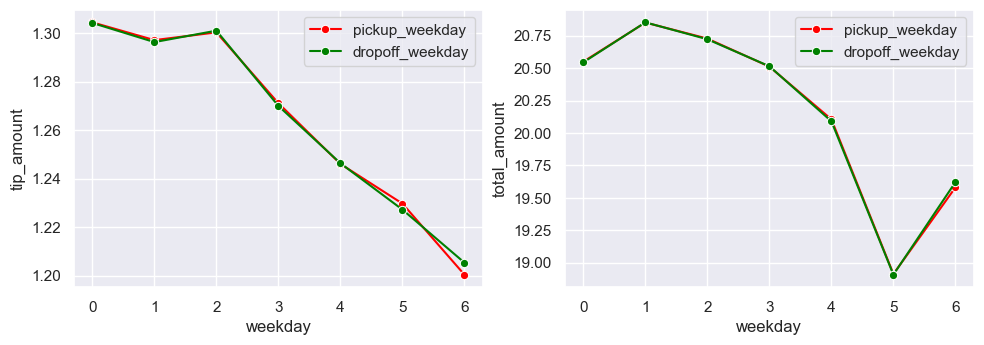

c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mayti\anaconda3\envs\greentaxi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

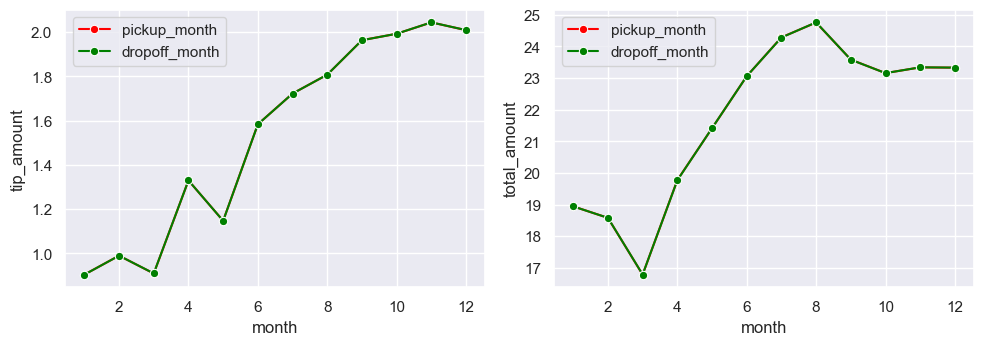

In [28]:
#compare tip_amount and total mount
x=[["pickup_hour","dropoff_hour"],["pickup_weekday","dropoff_weekday"],["pickup_month","dropoff_month"]]
y=["tip_amount","total_amount"]
data=df_step4
for col in x:
  x1=col[0]
  x2=col[1]
  f=plt.figure(figsize=(10,10))

  for i,amount in enumerate(y):

    ax=f.add_subplot(321+i)
    sns.set(rc = {'figure.figsize':(5,5)})
    ax0=sns.lineplot(x=x1,y=amount,data=data,errorbar=None,marker="o",label=x1,dashes=False,color="red",ax=ax)
    ax1=sns.lineplot(x=x2,y=amount,data=data,errorbar=None,label=x2,ax=ax0,marker="o",dashes=False,color="green")
    ax0.set(xlabel=x1.split("_")[1])

  plt.legend()
  plt.tight_layout()
  plt.show()
  f.savefig(picture_path+r'/eda_dual_time_variable_with_'+amount+' .png')


In [85]:
df_step4.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'PU_Borough',
       'PU_Zone', 'PU_service_zone', 'DO_Borough', 'DO_Zone',
       'DO_service_zone', 'trip_duration', 'pickup_month', 'pickup_weekday',
       'pickup_hour', 'dropoff_month', 'dropoff_weekday', 'dropoff_hour',
       'pickup_bin_hours', 'dropoff_bin_hours'],
      dtype='object')

In [31]:
def sumbar(do,pu,y,data,top=None):
  do_df=data.groupby(do, as_index=False) \
                    .agg({y:'sum'})
  pu_df=data.groupby(pu, as_index=False) \
                      .agg({y:'sum'})
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8),sharey=True)
  if top==None:
    ax[0].set_title(str(pu) + " with most "+str(y))
    ax[0].ticklabel_format(useOffset=False, style='plain', axis='y')

    sns.barplot(x=pu,y=y,data=pu_df,ax=ax[0])

    sns.barplot(x=do,y=y,data=do_df,ax=ax[1])
    ax[1].set_title(str(do)+" with most " +str(y))


    plt.tight_layout()
    fig.savefig(picture_path+r"/Barplot of "+ str(do.split("_",maxsplit=1)[1])+" with most "+str(y))
  else:
    putop= pu_df.sort_values(by=[y],ascending=False).set_index(pu).head(top)
    dotop= do_df.sort_values(by=[y],ascending=False).set_index(do).head(top)
    ax[0].set_title("Top " + str(top)+" "+ str(pu) + " with most "+str(y))
    ax[0].ticklabel_format(useOffset=False, style='plain', axis='y')
    sns.barplot(x=putop.index,y=y,data=putop,ax=ax[0])

    sns.barplot(x=dotop.index,y=y,data=dotop,ax=ax[1])
    ax[1].set_title("Top " + str(top)+ " " +str(do)+" with most " +str(y))
    plt.tight_layout()
    fig.savefig(picture_path+r"/Barplot of "+ "Top "+ str(top)+" "+str(do.split("_",maxsplit=1)[1])+" with most "+str(y))



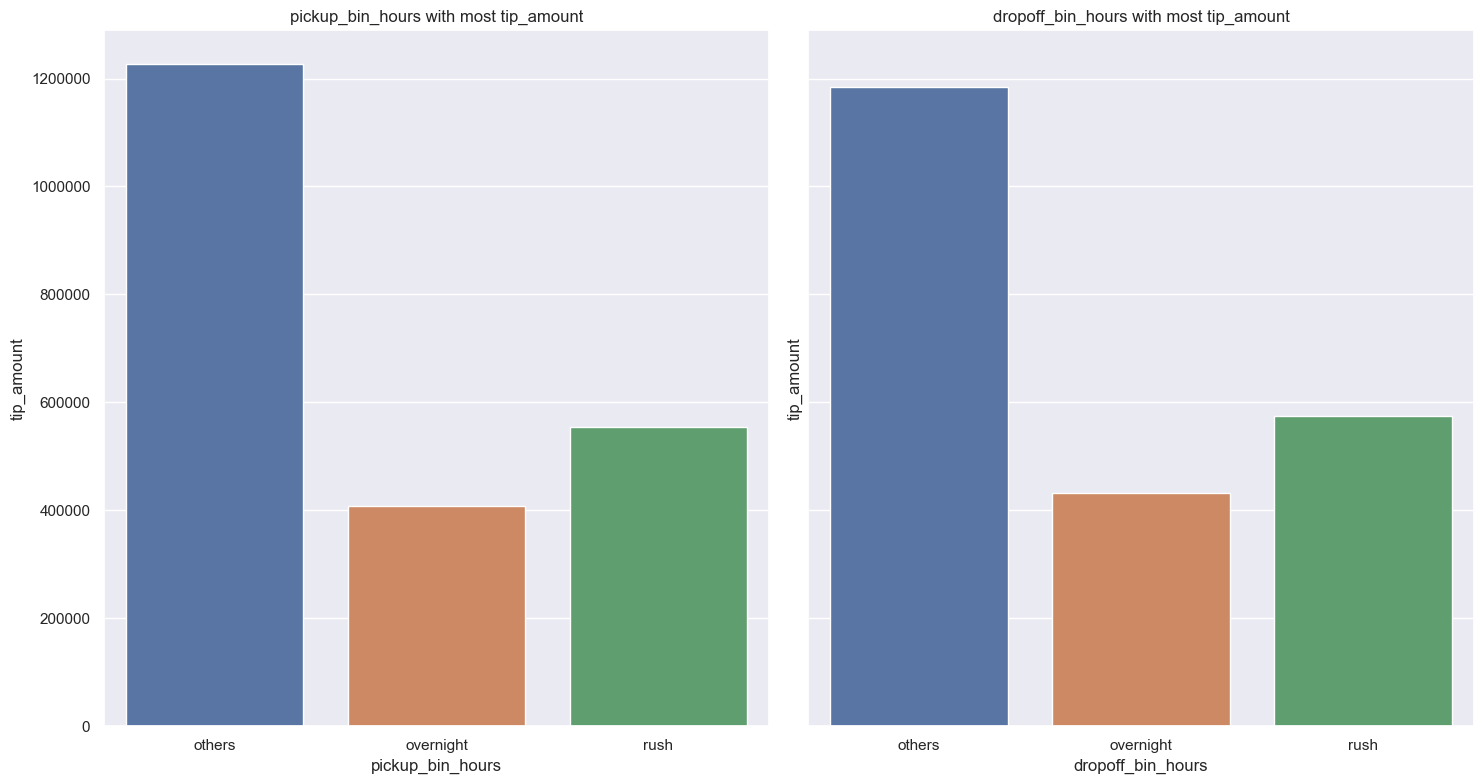

In [32]:
sumbar(pu="pickup_bin_hours",do="dropoff_bin_hours",data=df_step4,y="tip_amount")

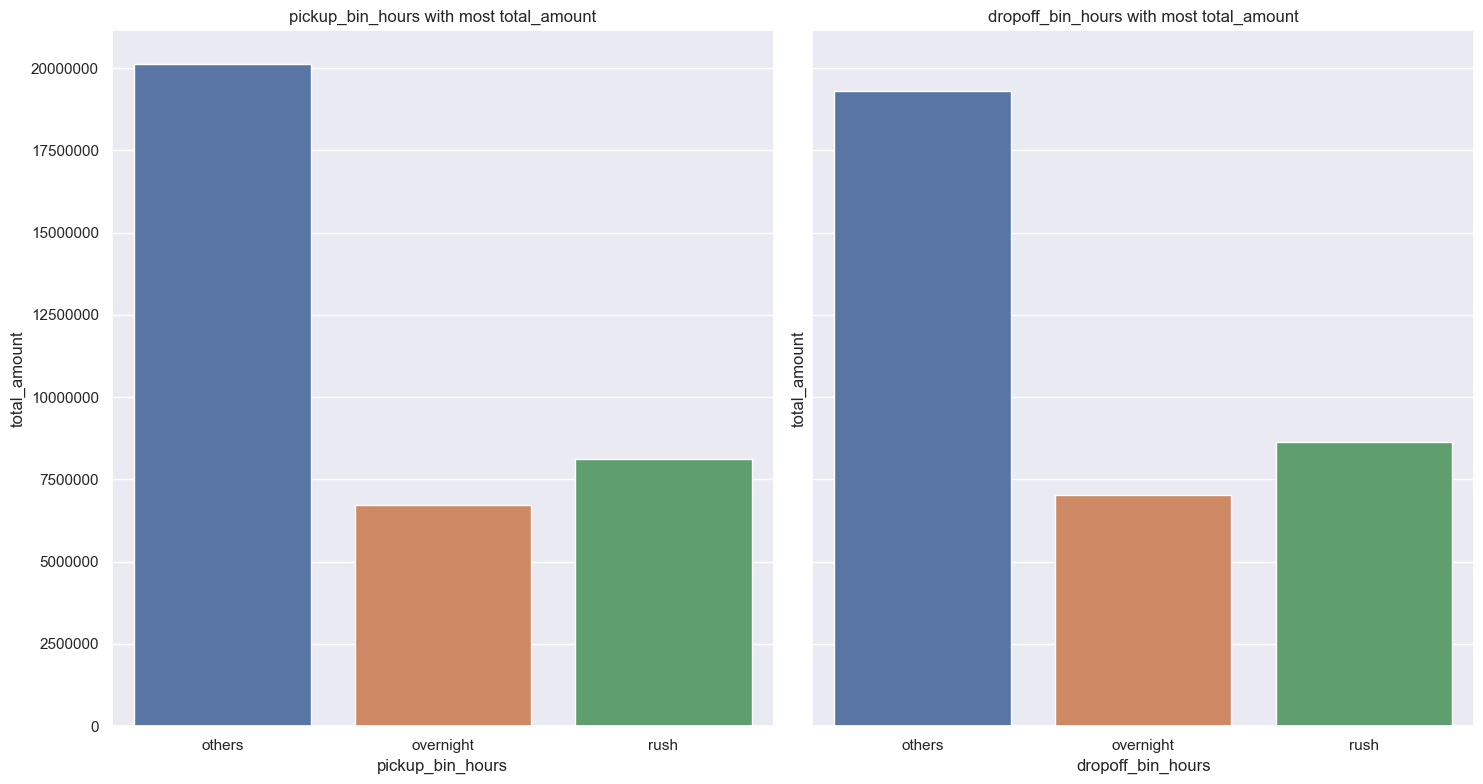

In [33]:
sumbar(pu="pickup_bin_hours",do="dropoff_bin_hours",data=df_step4,y="total_amount",top=None)

### 4.2.8 Ảnh hưởng của các biến địa lý tới tip_amount

In [34]:
df_tip_do = df_step4.groupby(["DO_Borough"], as_index=False) \
                    .agg({'tip_amount':'sum'}) \

df_tip_do

,DO_Borough,tip_amount
0,Bronx,214496.76
1,Brooklyn,550310.71
2,EWR,4373.59
3,Manhattan,953731.73
4,Queens,440493.33
5,Staten Island,3635.35
6,Unknown,23542.04


In [35]:
df_tip_pu = df_step4.groupby(["PU_Borough"], as_index=False) \
                    .agg({'tip_amount':'sum'}) \

df_tip_pu

,PU_Borough,tip_amount
0,Bronx,216142.11
1,Brooklyn,692396.38
2,EWR,270.82
3,Manhattan,819478.01
4,Queens,452449.72
5,Staten Island,2839.09
6,Unknown,7007.38


In [91]:
# PUtip = dict(zip(df_tip_pu['PU_Borough'].tolist(), df_tip_pu['tip_amount'].tolist()))
# DOtip = dict(zip(df_tip_do['DO_Borough'].tolist(), df_tip_do['tip_amount'].tolist()))

In [92]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
# ax = plt.subplot(1, 2, 1)
# ax.set_title("Pickup Boroughs with most tip")
# draw_region_map(ax, sf, heat = PUtip)
# ax = plt.subplot(1, 2, 2)
# ax.set_title("Dropoff Boroughs with most tip")
# draw_region_map(ax, sf, heat = DOtip)
# fig.savefig(path+"picture/Boroughs with most tip")

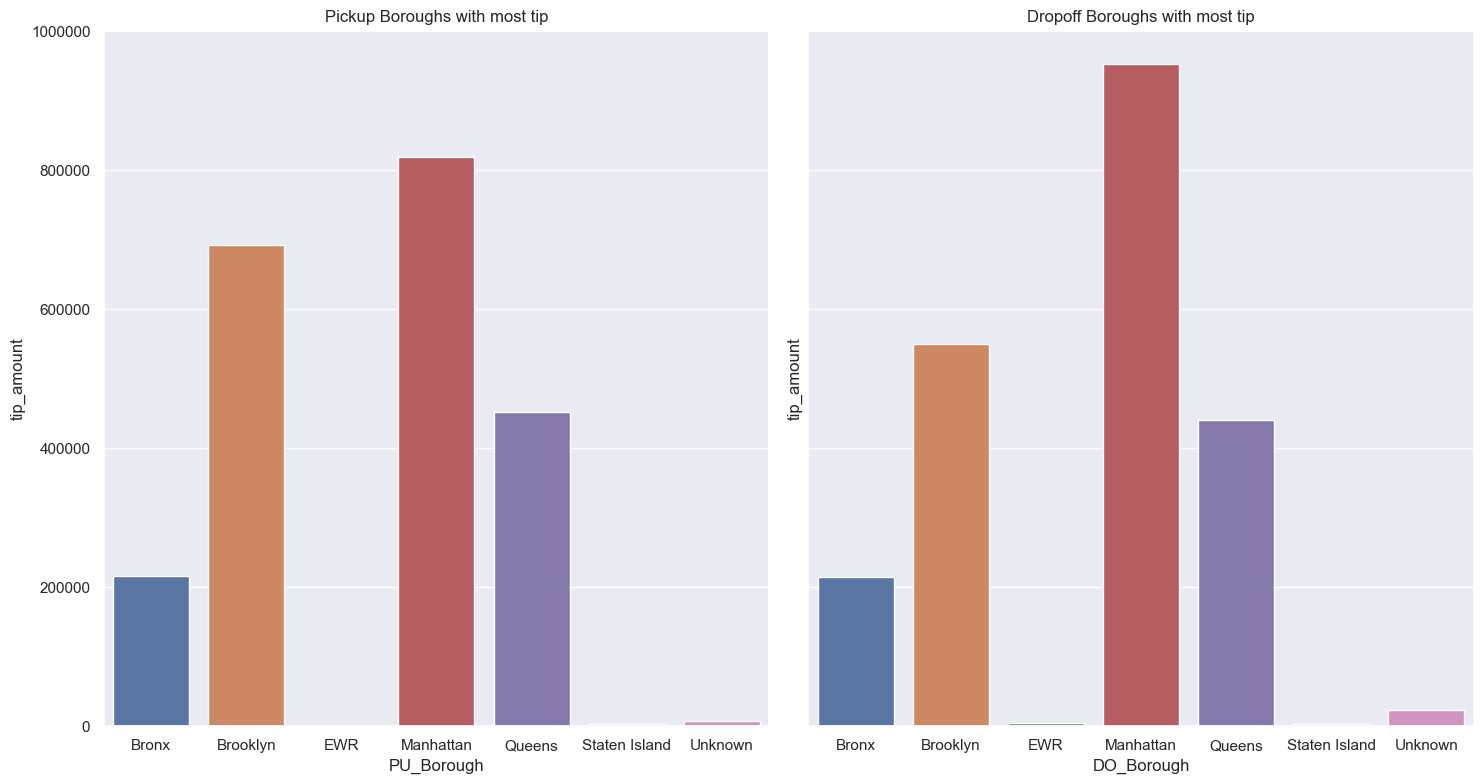

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8),sharey=True)
ax[0].set_title("Pickup Boroughs with most tip")
ax[0].ticklabel_format(useOffset=False, style='plain', axis='y')

sns.barplot(x="PU_Borough",y="tip_amount",data=df_tip_pu,ax=ax[0])

sns.barplot(x="DO_Borough",y="tip_amount",data=df_tip_do,ax=ax[1])
ax[1].set_title("Dropoff Boroughs with most tip")

plt.tight_layout()
fig.savefig(picture_path+r"/Barplot of Boroughs with most tip")

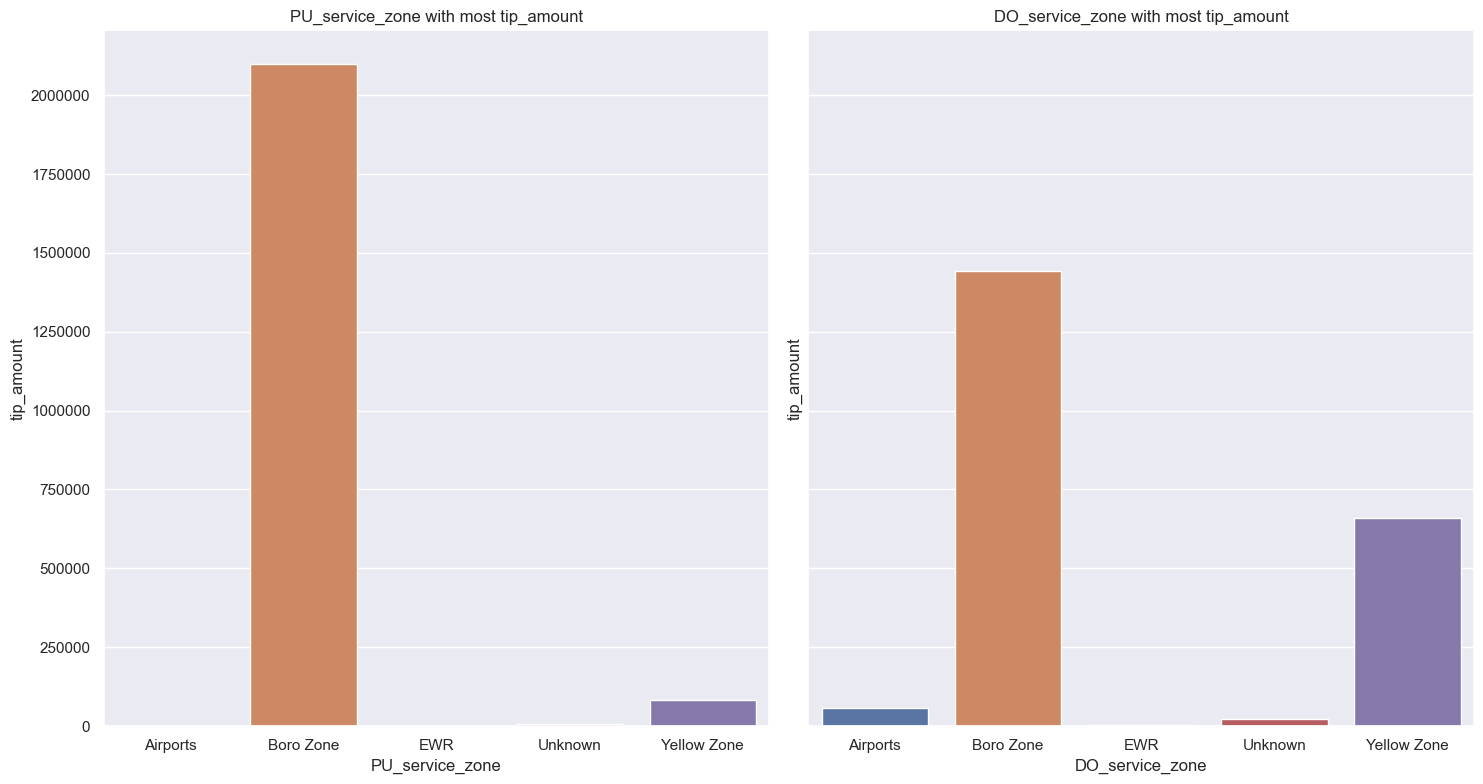

In [37]:
sumbar(pu="PU_service_zone",do="DO_service_zone",data=df_step4,y="tip_amount")

In [95]:
df_step4.columns


Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'PU_Borough',
       'PU_Zone', 'PU_service_zone', 'DO_Borough', 'DO_Zone',
       'DO_service_zone', 'trip_duration', 'pickup_month', 'pickup_weekday',
       'pickup_hour', 'dropoff_month', 'dropoff_weekday', 'dropoff_hour',
       'pickup_bin_hours', 'dropoff_bin_hours'],
      dtype='object')

In [38]:
zone_tip_do = df_step4.groupby(["DOLocationID"], as_index=False) \
                    .agg({'tip_amount':'sum'})

In [39]:
zone_tip_pu = df_step4.groupby(["PULocationID"], as_index=False) \
                    .agg({'tip_amount':'sum'})

In [40]:
PUcount = dict(zip(zone_tip_pu['PULocationID'].tolist(), zone_tip_pu['tip_amount'].tolist()))
PUtop3 = zone_tip_pu.sort_values(by=['tip_amount'], ascending=False).set_index("PULocationID").head(3)
DOcount = dict(zip(zone_tip_do['DOLocationID'].tolist(), zone_tip_do['tip_amount'].tolist()))
DOtop3 = zone_tip_do.sort_values(by=['tip_amount'], ascending=False).set_index("DOLocationID").head(3)

In [99]:
df_step4.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'PU_Borough',
       'PU_Zone', 'PU_service_zone', 'DO_Borough', 'DO_Zone',
       'DO_service_zone', 'trip_duration', 'pickup_month', 'pickup_weekday',
       'pickup_hour', 'dropoff_month', 'dropoff_weekday', 'dropoff_hour',
       'pickup_bin_hours', 'dropoff_bin_hours'],
      dtype='object')

In [100]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
# ax = plt.subplot(1, 2, 1)
# ax.set_title("Pickup Zones with most tips")
# draw_zone_map(ax, sf, heat=PUcount, text=PUtop3.index.tolist())
# ax = plt.subplot(1, 2, 2)
# ax.set_title("Dropoff Zones with most tips")
# draw_zone_map(ax, sf, heat=DOcount, text=DOtop3.index.tolist())
# f.savefig(path+"picture/Zones with most tips")

In [101]:
PUtop3.index

Int64Index([74, 75, 244], dtype='int64', name='PULocationID')

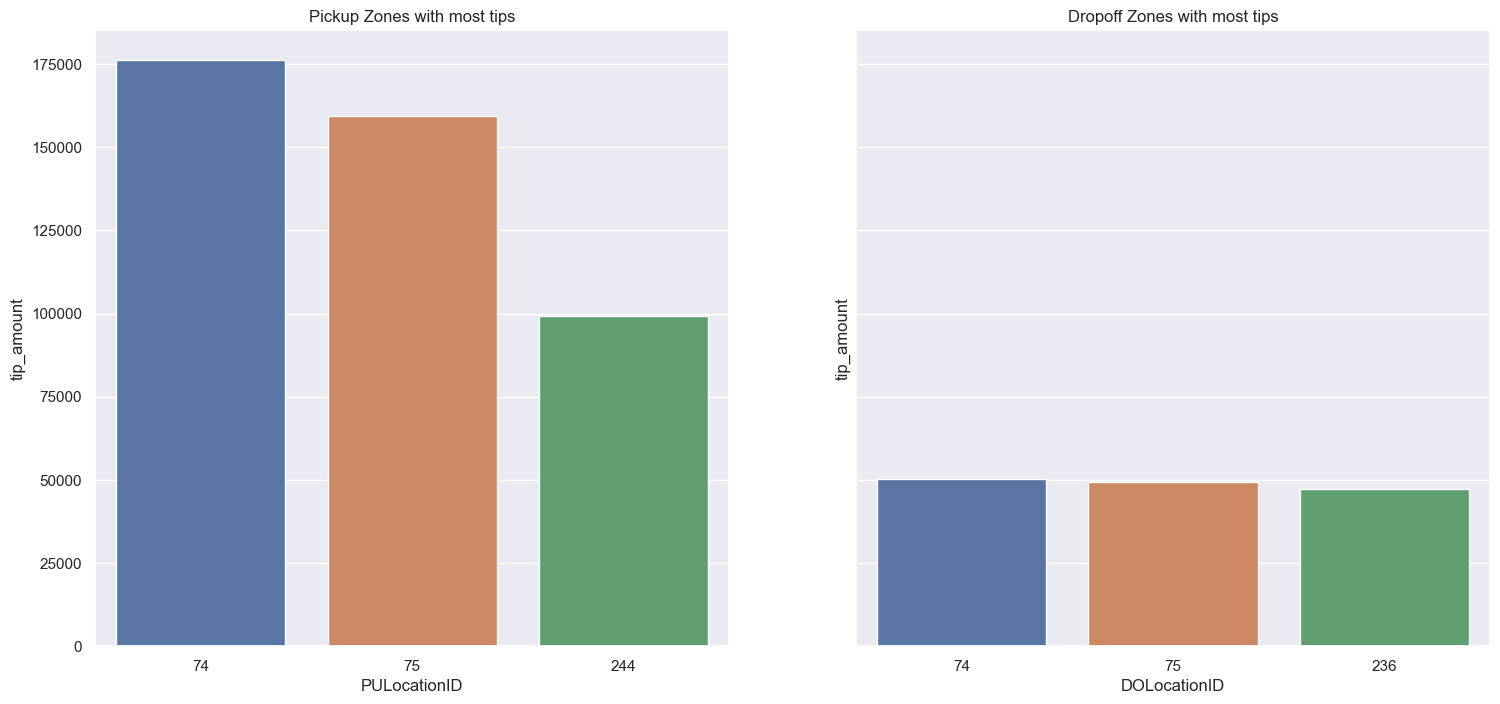

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8),sharey=True)
sns.barplot(x=PUtop3.index,y='tip_amount',data=PUtop3,ax=ax[0])
ax[0].set_title("Pickup Zones with most tips")

sns.barplot(x=DOtop3.index,y='tip_amount',data=DOtop3,ax=ax[1])
ax[1].set_title("Dropoff Zones with most tips")

f.savefig(picture_path+r"/Barplot of Top3 Zones with most tips")

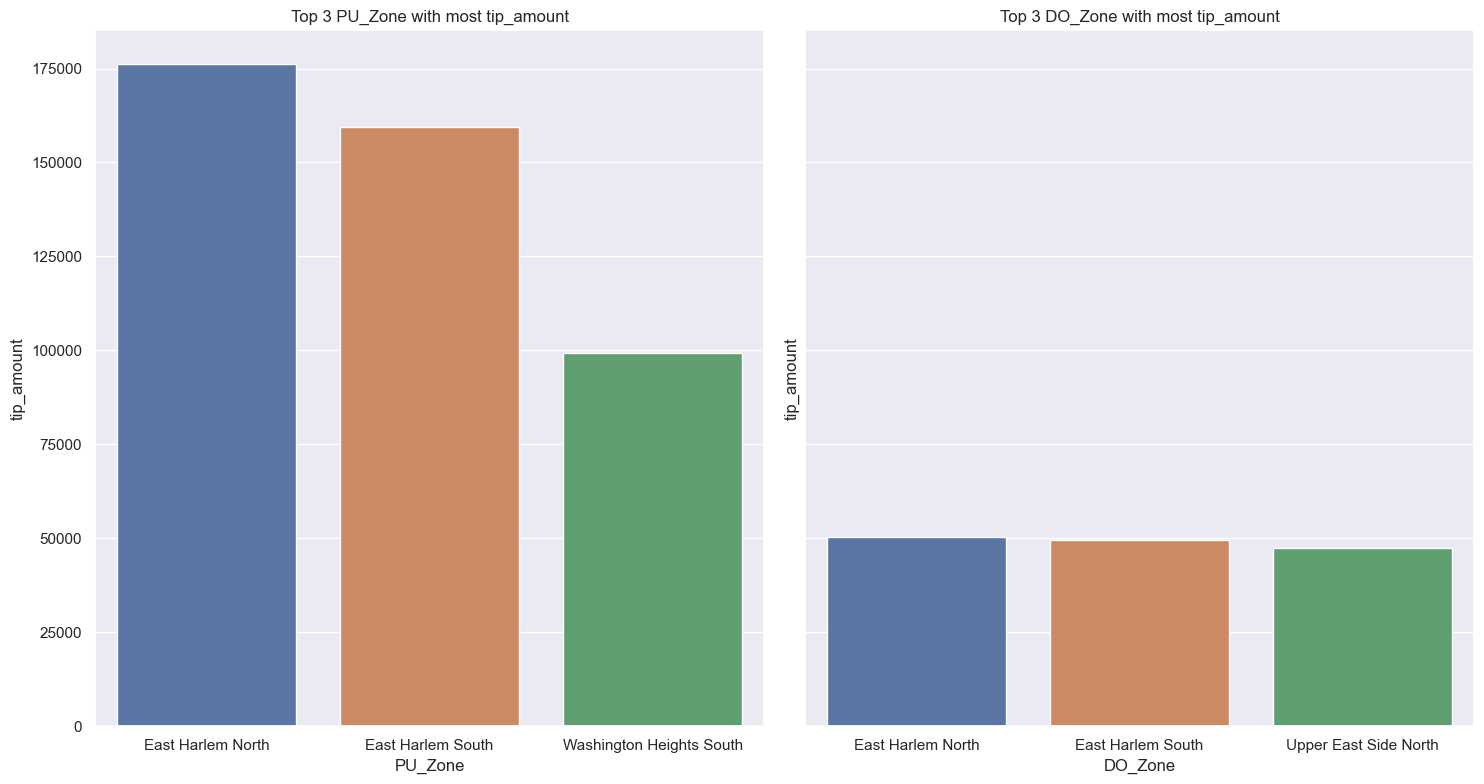

In [42]:
sumbar(pu="PU_Zone",do="DO_Zone",data=df_step4,y="tip_amount",top=3)

### 4.2.9 Visualize location variables with total_amount


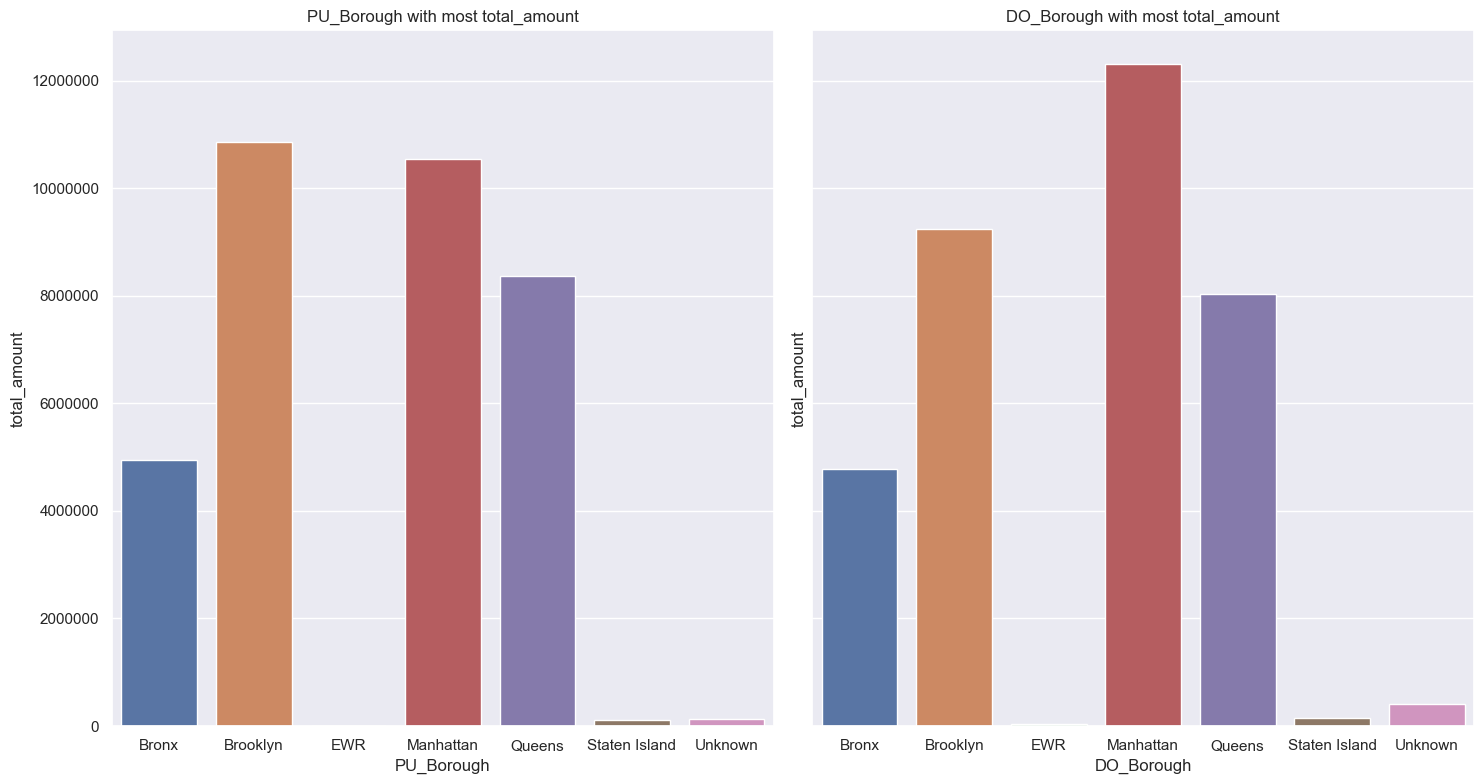

In [43]:
sumbar(pu="PU_Borough",do="DO_Borough",data=df_step4,y="total_amount")

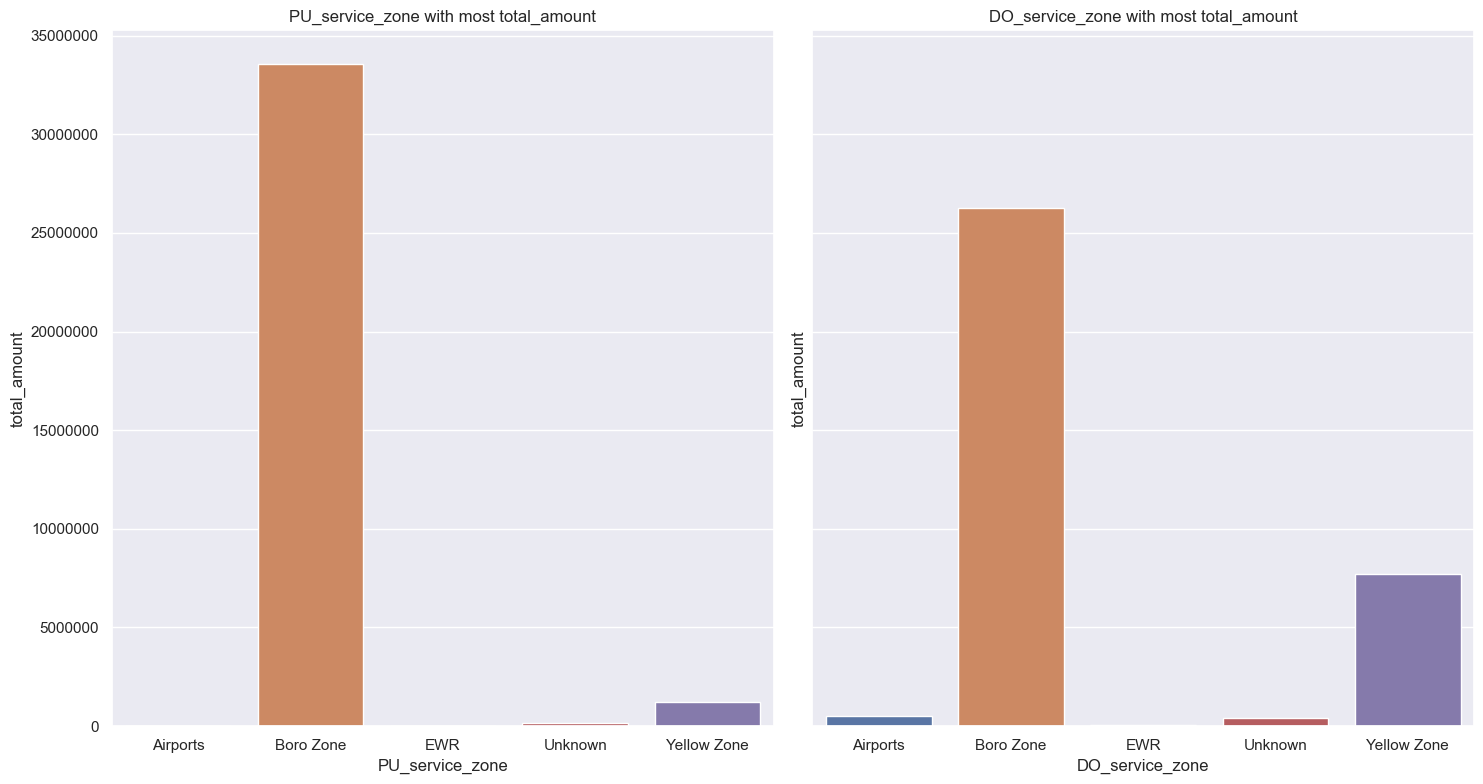

In [44]:
sumbar(pu="PU_service_zone",do="DO_service_zone",data=df_step4,y="total_amount")

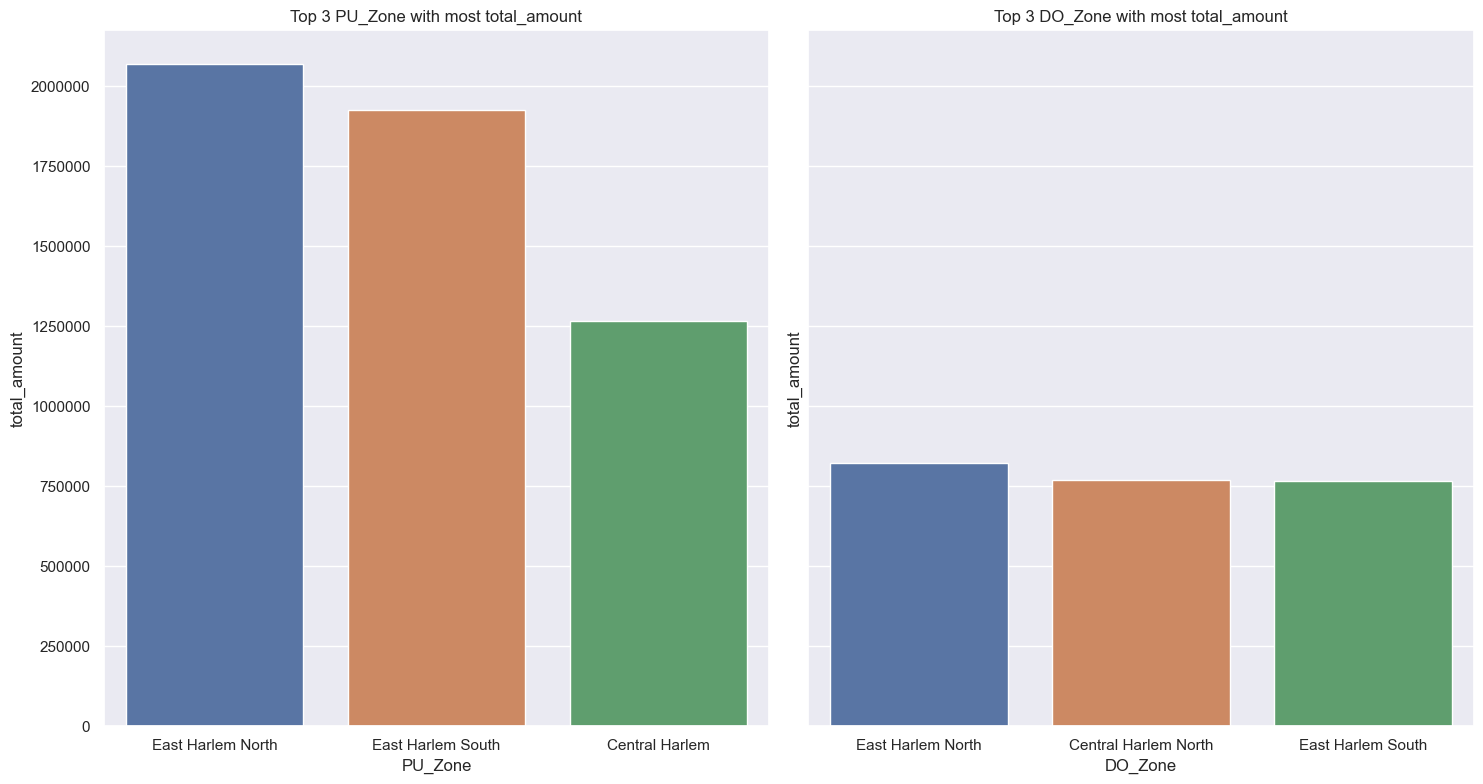

In [45]:
sumbar(pu="PU_Zone",do="DO_Zone",data=df_step4,y="total_amount",top=3)

###  4.2.10 Visualize total fare mount with tip amount


In [151]:
df_tipfare=df_step4.copy()

In [152]:
## total fare amount including mta_tax, fare amount, tolls amount, congestion surcharge, extra, and improvement surcharge
df_tipfare['total_fare_amount']=df_tipfare.fare_amount+df_tipfare.tolls_amount+df_tipfare.extra+df_tipfare.mta_tax+df_tipfare.congestion_surcharge+df_tipfare.improvement_surcharge

In [153]:
df_tipfare['tip_per_fare']=df_tipfare.tip_amount/df_tipfare.total_fare_amount *100


In [148]:
def checkinf(x,data):
    if len(data[data[x]==np.inf]) > 0:
        data[x]=data[x].replace(np.inf,np.NaN)
    data=data.dropna()
    return data

In [154]:
df_tipfare_drop=checkinf(x="tip_per_fare",data=df_tipfare)

In [157]:
len(df_tipfare_drop)/len(df_step4)

0.9672114268327884

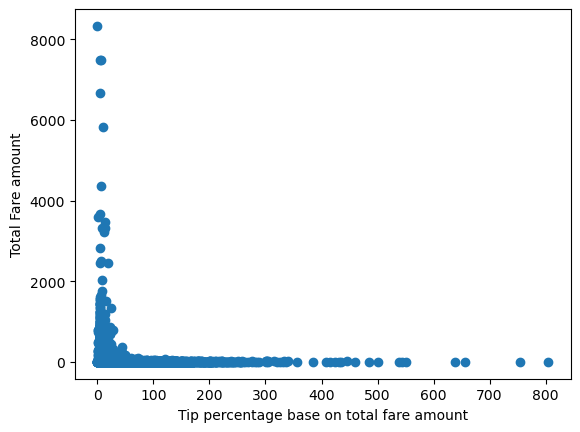

In [135]:
plt.scatter(df_tipfare.total_fare_amount,df_tipfare.tip_per)
plt.ylabel("Total Fare amount")
plt.xlabel("Tip percentage base on total fare amount")
plt.show()

In [158]:
df_tipfare.total_fare_amount

0            5.50
1            5.55
2           28.50
3           46.00
4           55.00
            ...  
1728768    107.45
1728769    121.20
1728770     97.24
1728771      4.50
1728772      4.00
Name: total_fare_amount, Length: 1728773, dtype: float64

In [156]:
df_tipfare_drop.total_fare_amount

0            5.50
1            5.55
2           28.50
3           46.00
4           55.00
            ...  
1728766     99.20
1728767     97.24
1728768    107.45
1728769    121.20
1728770     97.24
Name: total_fare_amount, Length: 1672089, dtype: float64

In [160]:
df_tipfare.total_fare_amount.describe()

count    1.728773e+06
mean     1.966680e+01
std      1.466530e+01
min      0.000000e+00
25%      9.500000e+00
50%      1.500000e+01
75%      2.491000e+01
max      8.045000e+02
Name: total_fare_amount, dtype: float64

In [159]:
df_tipfare_drop.total_fare_amount.describe()

count    1.672089e+06
mean     1.966987e+01
std      1.464110e+01
min      1.000000e-02
25%      9.500000e+00
50%      1.500000e+01
75%      2.483000e+01
max      8.045000e+02
Name: total_fare_amount, dtype: float64

In [138]:
def findQuartile(x,data):
    min=data[x].quantile(0)
    Q1=data[x].quantile(0.25)
    Q2=data[x].quantile(0.5)
    Q3=data[x].quantile(0.75)
    max=data[x].quantile(1)
    return [min,Q1,Q2,Q3,max]

In [139]:
def findIQR(x,data):
    min=data[x].quantile(0)
    Q1=data[x].quantile(0.25)
    Q2=data[x].quantile(0.5)
    Q3=data[x].quantile(0.75)
    IQR=Q3-Q1
    return [max(min,Q1-1.5*IQR),Q1,Q3,Q3+1.5*IQR]

In [140]:
def avgtipGroupby(x,y,by,data):
    if by=="QR":
        bins=findQuartile(x=x,data=data)
    else: bins=findIQR(x=x,data=data)

    range=pd.cut(data[x],bins=bins)
    avg_tip_per=data.groupby(range)[y].mean()
    return avg_tip_per

In [90]:
# bin_QR = findQuartile(x='total_fare_amount',data=df_step4)
# fare_ranges_QR=pd.cut(df_step4.total_fare_amount,bins=bin_QR)

# avg_tip_per_QR=df_step4.groupby(fare_ranges_QR)['tip_per'].mean()


C:\Users\mayti\AppData\Local\Temp\ipykernel_9564\2050450673.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_per_QR=df_step4.groupby(fare_ranges_QR)['tip_per'].mean()


In [161]:
avg_tip_per_fare_QR=avgtipGroupby(x='total_fare_amount',y='tip_per_fare',by="QR",data=df_tipfare)
avg_tip_per_fare_QR_drop=avgtipGroupby(x='total_fare_amount',y='tip_per_fare',by="QR",data=df_tipfare_drop)


C:\Users\mayti\AppData\Local\Temp\ipykernel_9564\4219329508.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_per=data.groupby(range)[y].mean()
C:\Users\mayti\AppData\Local\Temp\ipykernel_9564\4219329508.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_per=data.groupby(range)[y].mean()


In [164]:
print(avg_tip_per_fare_QR)
print(avg_tip_per_fare_QR_drop)

total_fare_amount
(0.0, 9.5]        8.472619
(9.5, 15.0]       8.714861
(15.0, 24.91]     8.492616
(24.91, 804.5]    4.864852
Name: tip_per_fare, dtype: float64
total_fare_amount
(0.01, 9.5]       8.668493
(9.5, 15.0]       8.882776
(15.0, 24.83]     8.881641
(24.83, 804.5]    5.055055
Name: tip_per_fare, dtype: float64


In [162]:
avg_tip_per_fare_IQR=avgtipGroupby(x='total_fare_amount',y='tip_per_fare',by="IQR",data=df_tipfare)
avg_tip_per_fare_IQR_drop=avgtipGroupby(x='total_fare_amount',y='tip_per_fare',by="IQR",data=df_tipfare_drop)


C:\Users\mayti\AppData\Local\Temp\ipykernel_9564\4219329508.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_per=data.groupby(range)[y].mean()
C:\Users\mayti\AppData\Local\Temp\ipykernel_9564\4219329508.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_per=data.groupby(range)[y].mean()


In [165]:
print(avg_tip_per_fare_IQR)
print(avg_tip_per_fare_IQR_drop)

total_fare_amount
(0.0, 9.5]         8.472619
(9.5, 24.91]       8.599668
(24.91, 48.025]    5.486696
Name: tip_per_fare, dtype: float64
total_fare_amount
(0.01, 9.5]        8.668493
(9.5, 24.83]       8.882196
(24.83, 47.825]    5.724068
Name: tip_per_fare, dtype: float64


In [204]:
def barplot_avgtip(x,data,by,dropna=False):
    title="Barplot of "+str(x)+" and tip percentage with "
    
    f,ax=plt.subplots(figsize=(8,10))
    ax=data.plot(kind="bar")

    plt.ylabel("Average of tip percentage")
    plt.xticks(rotation = 0)
    # add % to y axes
    plt.gca().set_yticklabels([f'{int(y)}%' for y in plt.gca().get_yticks()])
    # add legend beneath x axes
    xtick_labels = ax.get_xticklabels()
    string_list = [label.get_text() for label in xtick_labels]
    if by=="QR":
        title=title +"quantile"
        labels=[string_list[i] +"\n Q"+str(i+1) for i in range(len(string_list))]
    else:
        legend=["Q1-1.5*IQR","Q1-Q3","Q3+1.5*IQR"]
        title=title + "IQR"
        labels=[string_list[i] +"\n "+legend[i] for i in range(len(string_list))]
    
    ax.set_xticklabels(labels)
    ax.bar_label(ax.containers[0], label_type='edge')

    if dropna==True:
        title=title+" after dropna"
    plt.title(title)
    plt.show()
    f.savefig(picture_path+r"/"+title)

C:\Users\mayti\AppData\Local\Temp\ipykernel_9564\3727621372.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(y)}%' for y in plt.gca().get_yticks()])


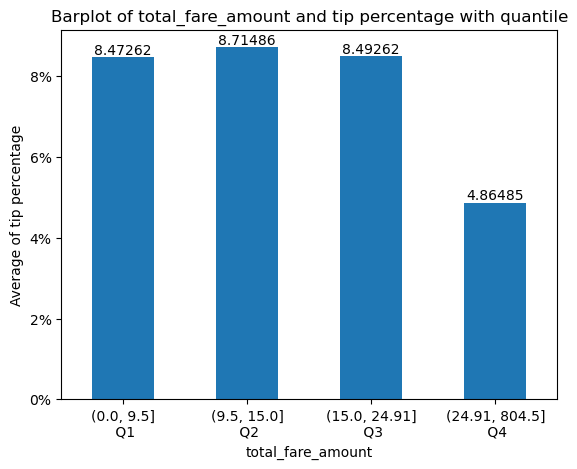

In [167]:
barplot_avgtip(x="total_fare_amount",data=avg_tip_per_fare_QR,by="QR")

C:\Users\mayti\AppData\Local\Temp\ipykernel_9564\3727621372.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(y)}%' for y in plt.gca().get_yticks()])


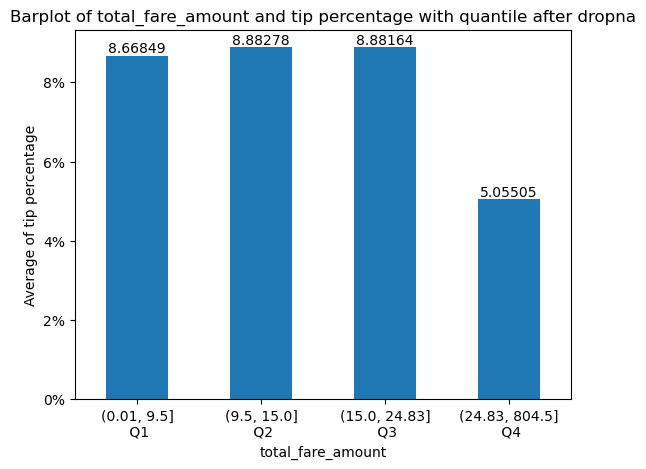

In [168]:
barplot_avgtip(x="total_fare_amount",data=avg_tip_per_fare_QR_drop,by="QR",dropna=True)

In [106]:
# legend=["Q1-1.5*IQR","Q1-Q3","Q3+1.5*IQR"]
# f,ax=plt.subplots()
# ax=avg_tip_per_IQR.plot(kind="bar")
# plt.ylabel("Average of tip percentage")
# plt.xticks(rotation = 0)
# # add % to y axes
# plt.gca().set_yticklabels([f'{int(y)}%' for y in plt.gca().get_yticks()])
# # add legend beneath x axes
# xtick_labels = ax.get_xticklabels()
# string_list = [label.get_text() for label in xtick_labels]
# labels=[string_list[i] +"\n "+legend[i] for i in range(len(string_list))]
# ax.set_xticklabels(labels)
# ax.bar_label(ax.containers[0], label_type='edge')

# plt.title("Barplot of total_fare_amount and tip percentage with IQR")
# plt.show()
# f.savefig(picture_path+r"/Barplot of total_fare_amount and tip percentage with IQR")

C:\Users\mayti\AppData\Local\Temp\ipykernel_9564\3727621372.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(y)}%' for y in plt.gca().get_yticks()])


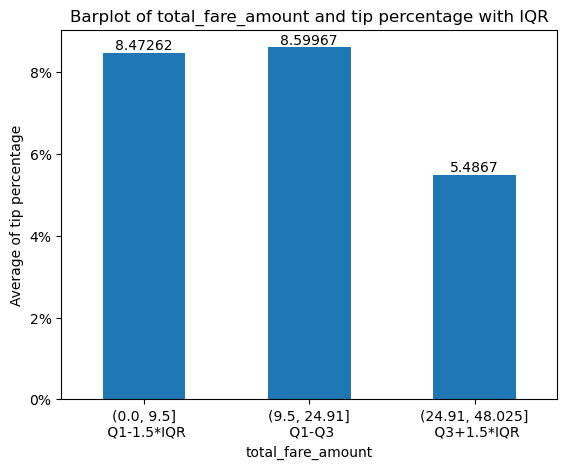

In [169]:
barplot_avgtip(x="total_fare_amount",data=avg_tip_per_fare_IQR,by="IQR")

C:\Users\mayti\AppData\Local\Temp\ipykernel_9564\3727621372.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(y)}%' for y in plt.gca().get_yticks()])


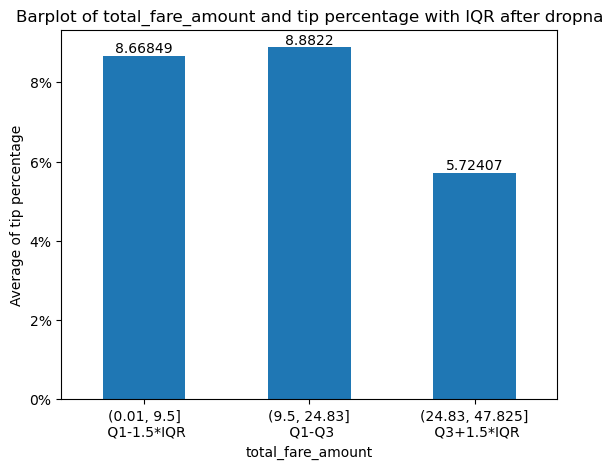

In [170]:
barplot_avgtip(x="total_fare_amount",data=avg_tip_per_fare_IQR_drop,by="IQR",dropna=True)

###  4.2.11 Visualize trip distance  with tip amount

In [172]:
df_tiptrip=df_step4.copy()

In [173]:
df_tiptrip["tip_per_trip_distance"]=df_tiptrip.tip_amount/df_tiptrip.trip_distance *100


In [174]:
df_tiptrip_drop=checkinf(x='tip_per_trip_distance',data=df_tiptrip)

In [176]:
len(df_tiptrip_drop)/len(df_step4)

0.9616728165004891

<Axes: xlabel='trip_distance', ylabel='tip_amount'>

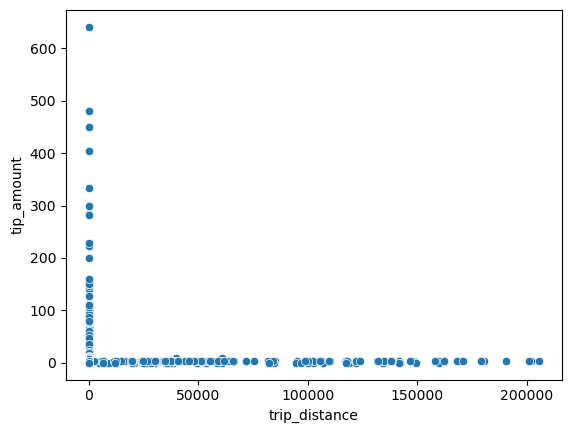

In [178]:
sns.scatterplot(x='trip_distance',y='tip_amount',data= df_tiptrip)

In [180]:
df_tiptrip.trip_distance.describe()

count    1.728773e+06
mean     1.734809e+01
std      1.199992e+03
min      0.000000e+00
25%      1.130000e+00
50%      2.220000e+00
75%      4.880000e+00
max      2.056541e+05
Name: trip_distance, dtype: float64

In [181]:
df_tiptrip_drop.trip_distance.describe()

count    1.662514e+06
mean     1.802872e+01
std      1.223661e+03
min      1.000000e-02
25%      1.230000e+00
50%      2.340000e+00
75%      5.060000e+00
max      2.056541e+05
Name: trip_distance, dtype: float64

In [182]:
avg_tip_per_dis_QR=avgtipGroupby(x="trip_distance",data=df_tiptrip,by="QR",y="tip_per_trip_distance")
avg_tip_per_dis_QR_drop=avgtipGroupby(x="trip_distance",data=df_tiptrip_drop,by="QR",y="tip_per_trip_distance")


C:\Users\mayti\AppData\Local\Temp\ipykernel_9564\4219329508.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_per=data.groupby(range)[y].mean()
C:\Users\mayti\AppData\Local\Temp\ipykernel_9564\4219329508.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_per=data.groupby(range)[y].mean()


In [183]:
print(avg_tip_per_dis_QR)
avg_tip_per_dis_QR_drop

trip_distance
(0.0, 1.13]          180.475525
(1.13, 2.22]          65.011506
(2.22, 4.88]          46.366283
(4.88, 205654.12]     22.150491
Name: tip_per_trip_distance, dtype: float64


trip_distance
(0.01, 1.23]         130.903700
(1.23, 2.34]          63.276088
(2.34, 5.06]          45.270839
(5.06, 205654.12]     21.726512
Name: tip_per_trip_distance, dtype: float64

C:\Users\mayti\AppData\Local\Temp\ipykernel_9564\3727621372.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(y)}%' for y in plt.gca().get_yticks()])


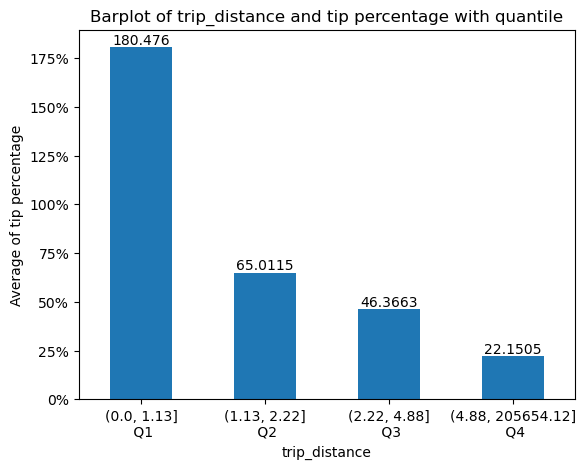

In [184]:
barplot_avgtip(data=avg_tip_per_dis_QR,by="QR",x="trip_distance")

C:\Users\mayti\AppData\Local\Temp\ipykernel_9564\3727621372.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(y)}%' for y in plt.gca().get_yticks()])


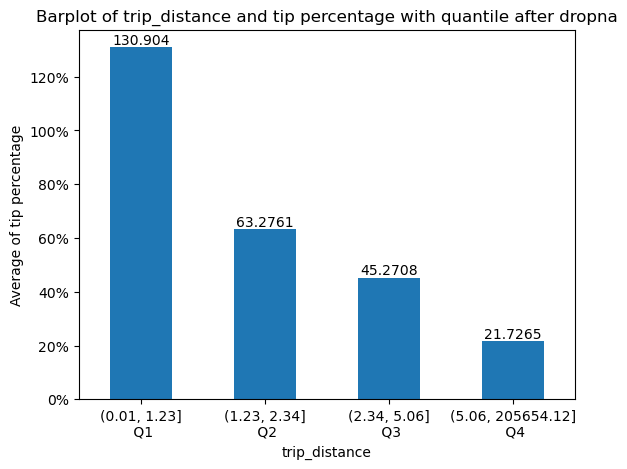

In [185]:
barplot_avgtip(data=avg_tip_per_dis_QR_drop,by="QR",x="trip_distance",dropna=True)

In [186]:
avg_tip_per_dis_IQR=avgtipGroupby(x="trip_distance",y="tip_per_trip_distance",by="IQR",data=df_tiptrip)
avg_tip_per_dis_IQR_drop=avgtipGroupby(x="trip_distance",y="tip_per_trip_distance",by="IQR",data=df_tiptrip_drop)


C:\Users\mayti\AppData\Local\Temp\ipykernel_9564\4219329508.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_per=data.groupby(range)[y].mean()
C:\Users\mayti\AppData\Local\Temp\ipykernel_9564\4219329508.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_per=data.groupby(range)[y].mean()


In [187]:
print(avg_tip_per_dis_IQR)
avg_tip_per_dis_IQR_drop

trip_distance
(0.0, 1.13]       180.475525
(1.13, 4.88]       55.716157
(4.88, 10.505]     28.019056
Name: tip_per_trip_distance, dtype: float64


trip_distance
(0.01, 1.23]      130.903700
(1.23, 5.06]       54.271929
(5.06, 10.805]     27.428436
Name: tip_per_trip_distance, dtype: float64

C:\Users\mayti\AppData\Local\Temp\ipykernel_9564\3727621372.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(y)}%' for y in plt.gca().get_yticks()])


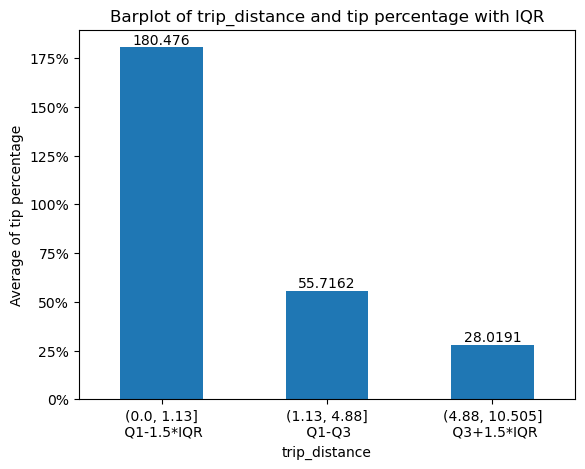

In [188]:
barplot_avgtip(x='trip_distance',data=avg_tip_per_dis_IQR,by="IQR")

C:\Users\mayti\AppData\Local\Temp\ipykernel_9564\3727621372.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(y)}%' for y in plt.gca().get_yticks()])


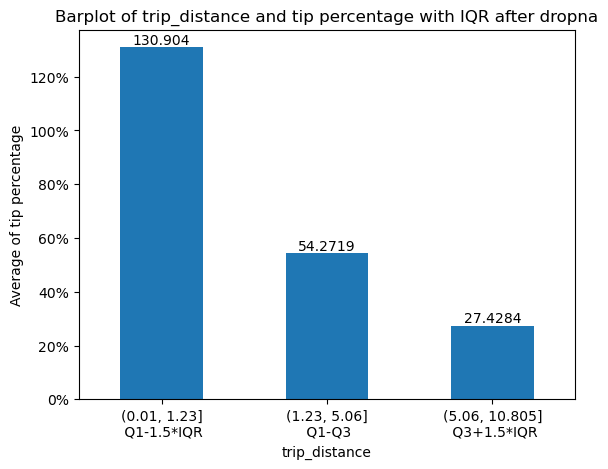

In [189]:
barplot_avgtip(x='trip_distance',data=avg_tip_per_dis_IQR_drop,by="IQR",dropna=True)

### Visualize trip duration with tip amount


In [115]:
df_tipdur=df_step4.copy()

In [118]:
df_tipdur['tip_per_trip_duration']=df_tipdur['tip_amount']/df_tipdur['trip_duration'] *100


In [190]:
df_tipdur_drop=checkinf(x="tip_per_trip_duration",data=df_tipdur)

In [191]:
df_tipdur.trip_duration.describe()

count    1.728773e+06
mean     2.054096e+01
std      7.403520e+01
min      0.000000e+00
25%      7.250000e+00
50%      1.273333e+01
75%      2.181667e+01
max      1.439983e+03
Name: trip_duration, dtype: float64

In [192]:
df_tipdur_drop.trip_duration.describe()

count    1.671381e+06
mean     2.057417e+01
std      7.467913e+01
min      1.666667e-02
25%      7.316667e+00
50%      1.266667e+01
75%      2.148333e+01
max      1.439967e+03
Name: trip_duration, dtype: float64

In [193]:
avg_tip_per_dur_QR=avgtipGroupby(x="trip_duration",y="tip_per_trip_duration",by="QR",data=df_tipdur)
avg_tip_per_dur_QR_drop=avgtipGroupby(x="trip_duration",y="tip_per_trip_duration",by="QR",data=df_tipdur_drop)

C:\Users\mayti\AppData\Local\Temp\ipykernel_9564\4219329508.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_per=data.groupby(range)[y].mean()
C:\Users\mayti\AppData\Local\Temp\ipykernel_9564\4219329508.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_per=data.groupby(range)[y].mean()


In [194]:
print(avg_tip_per_dur_QR)
avg_tip_per_dur_QR_drop

trip_duration
(0.0, 7.25]           93.908967
(7.25, 12.733]        11.188924
(12.733, 21.817]       9.134318
(21.817, 1439.983]     5.367895
Name: tip_per_trip_duration, dtype: float64


trip_duration
(0.0167, 7.317]       87.718809
(7.317, 12.667]       11.359350
(12.667, 21.483]       9.396541
(21.483, 1439.967]     5.675693
Name: tip_per_trip_duration, dtype: float64

C:\Users\mayti\AppData\Local\Temp\ipykernel_9564\3705437598.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(y)}%' for y in plt.gca().get_yticks()])


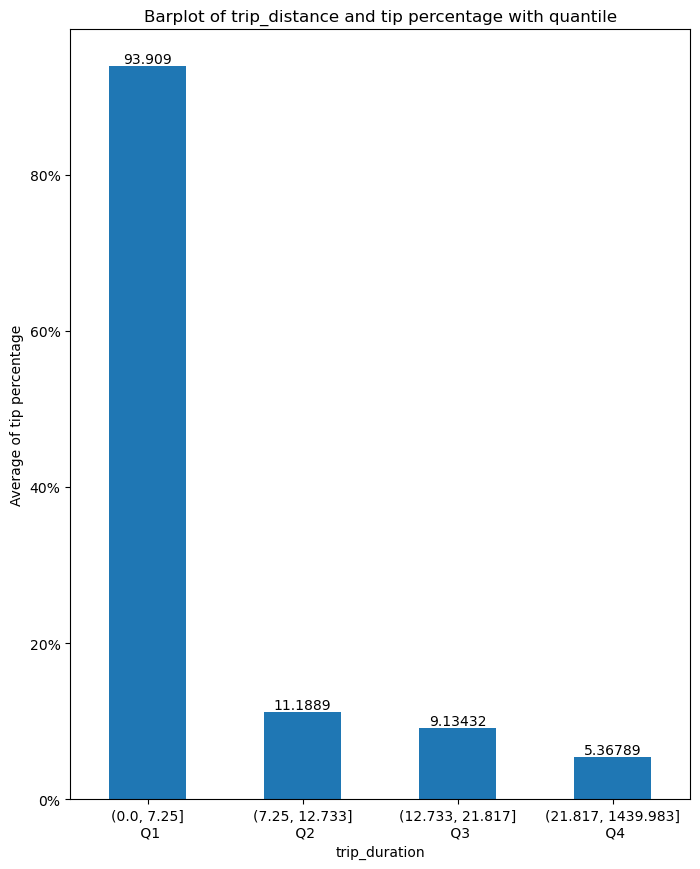

In [205]:
barplot_avgtip(x="trip_distance",data=avg_tip_per_dur_QR,by="QR")

C:\Users\mayti\AppData\Local\Temp\ipykernel_9564\3705437598.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(y)}%' for y in plt.gca().get_yticks()])


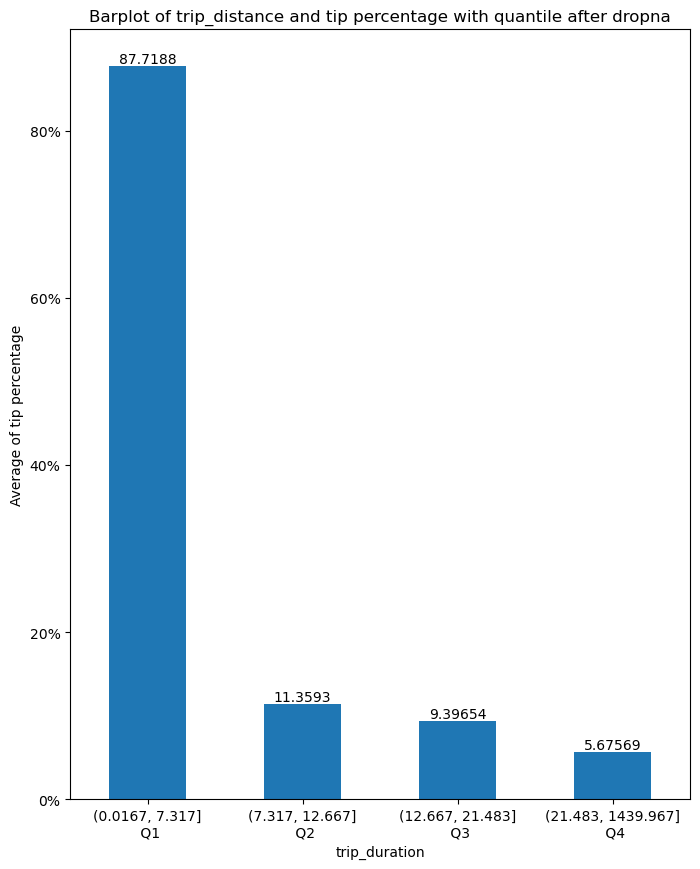

In [206]:
barplot_avgtip(x="trip_distance",data=avg_tip_per_dur_QR_drop,by="QR",dropna=True)

In [207]:
avg_tip_per_dur_IQR=avgtipGroupby(x="trip_duration",y="tip_per_trip_duration",by="IQR",data=df_tipdur)
avg_tip_per_dur_IQR_drop=avgtipGroupby(x="trip_duration",y="tip_per_trip_duration",by="IQR",data=df_tipdur_drop)

C:\Users\mayti\AppData\Local\Temp\ipykernel_9564\4219329508.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_per=data.groupby(range)[y].mean()
C:\Users\mayti\AppData\Local\Temp\ipykernel_9564\4219329508.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_per=data.groupby(range)[y].mean()


In [208]:
print(avg_tip_per_dur_IQR)
avg_tip_per_dur_IQR_drop

trip_duration
(0.0, 7.25]         93.908967
(7.25, 21.817]      10.162437
(21.817, 43.667]     6.034174
Name: tip_per_trip_duration, dtype: float64


trip_duration
(0.0167, 7.317]     87.718809
(7.317, 21.483]     10.378296
(21.483, 42.733]     6.417219
Name: tip_per_trip_duration, dtype: float64

C:\Users\mayti\AppData\Local\Temp\ipykernel_9564\3705437598.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(y)}%' for y in plt.gca().get_yticks()])


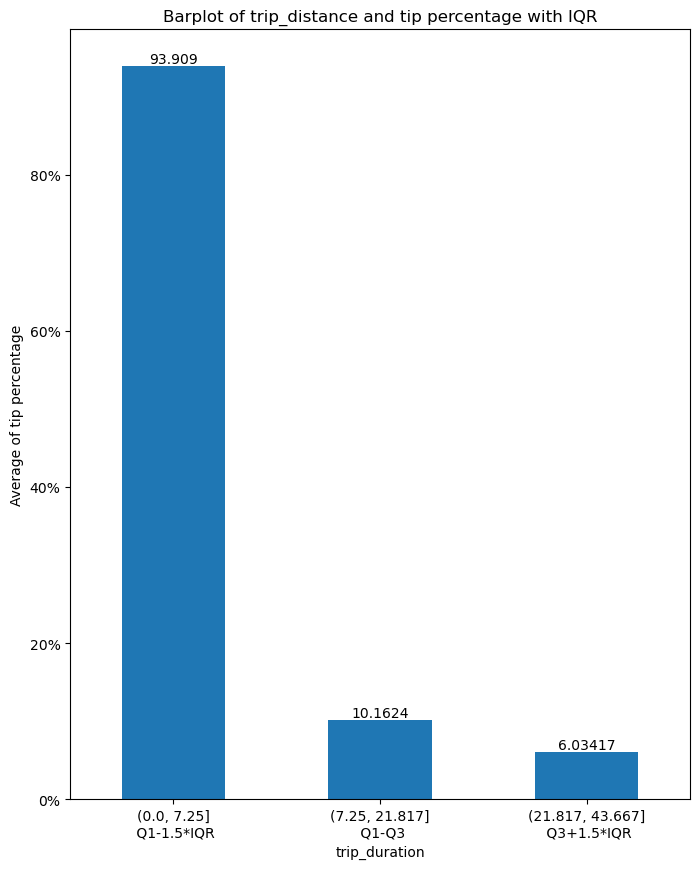

In [209]:
barplot_avgtip(x="trip_distance",data=avg_tip_per_dur_IQR,by="IQR")

C:\Users\mayti\AppData\Local\Temp\ipykernel_9564\3705437598.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(y)}%' for y in plt.gca().get_yticks()])


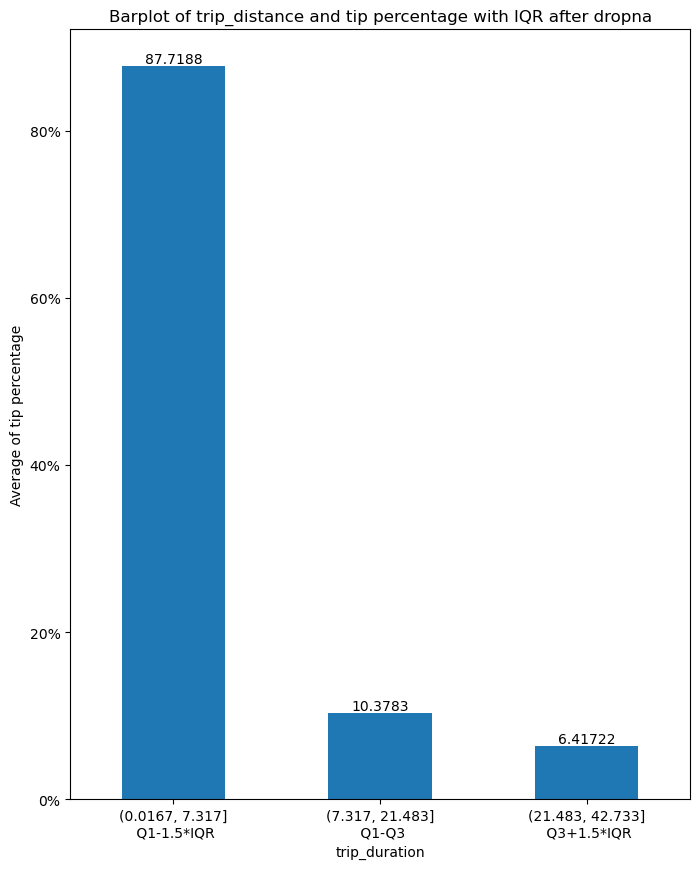

In [210]:
barplot_avgtip(x="trip_distance",data=avg_tip_per_dur_IQR_drop,by="IQR",dropna=True)